# Predict future sales 

dataset that is taken from kaggel

### Task

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month.

**File descriptions**
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

**Data fields**
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=3, suppress=True)

In [3]:
df = pd.read_csv('sales_train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

# Display datasets

In [4]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00          1.00
1  03.01.2013               0       25     2552      899.00          1.00
2  05.01.2013               0       25     2552      899.00         -1.00
3  06.01.2013               0       25     2554    1,709.05          1.00
4  15.01.2013               0       25     2555    1,099.00          1.00

In [5]:
df[df.item_cnt_day > 1].head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
9   03.01.2013               0       25     2573      299.00          3.00
10  03.01.2013               0       25     2574      399.00          2.00
13  08.01.2013               0       25     2574      399.00          2.00
15  11.01.2013               0       25     2574      399.00          2.00
47  10.01.2013               0       25     2746      299.00          2.00

In [6]:
test_df.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [7]:
sample_submission.head()

ID  item_cnt_month
0   0            0.50
1   1            0.50
2   2            0.50
3   3            0.50
4   4            0.50

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

In [8]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [9]:
items = items.drop('item_name', axis=1)
items.head()

item_id  item_category_id
0        0                40
1        1                76
2        2                40
3        3                40
4        4                40

In [10]:
item_categories.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [11]:
item_categories.shape

(84, 2)

In [12]:
item_categories[item_categories.item_category_id == 40]

item_category_name  item_category_id
40         Кино - DVD                40

In [13]:
shops.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

# Joining dataframes

I need to join the items to the main dataframe

In [14]:
df = df.join(items.set_index('item_id'), on='item_id')

In [15]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00          1.00   
1  03.01.2013               0       25     2552      899.00          1.00   
2  05.01.2013               0       25     2552      899.00         -1.00   
3  06.01.2013               0       25     2554    1,709.05          1.00   
4  15.01.2013               0       25     2555    1,099.00          1.00   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

# Analyze main dataframe

In [16]:
df.shape

(2935849, 7)

In [17]:
df.describe()

date_block_num      shop_id      item_id   item_price  item_cnt_day  \
count    2,935,849.00 2,935,849.00 2,935,849.00 2,935,849.00  2,935,849.00   
mean            14.57        33.00    10,197.23       890.85          1.24   
std              9.42        16.23     6,324.30     1,729.80          2.62   
min              0.00         0.00         0.00        -1.00        -22.00   
25%              7.00        22.00     4,476.00       249.00          1.00   
50%             14.00        31.00     9,343.00       399.00          1.00   
75%             23.00        47.00    15,684.00       999.00          1.00   
max             33.00        59.00    22,169.00   307,980.00      2,169.00   

       item_category_id  
count      2,935,849.00  
mean              40.00  
std               17.10  
min                0.00  
25%               28.00  
50%               40.00  
75%               55.00  
max               83.00

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_category_id  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 156.8+ MB


# Looking for missing values

In [19]:
df.isna().value_counts()

date   date_block_num  shop_id  item_id  item_price  item_cnt_day  item_category_id
False  False           False    False    False       False         False               2935849
dtype: int64

# Analyzing data distributions

In [20]:
date_block_value_counts = df.date_block_num.value_counts()

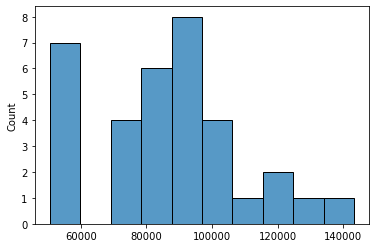

In [21]:
sns.histplot(date_block_value_counts.values, bins=10);

In [22]:
date_value_counts = df.date.value_counts()
date_value_counts.head()

28.12.2013    9434
29.12.2013    9335
30.12.2014    9324
30.12.2013    9138
31.12.2014    8347
Name: date, dtype: int64

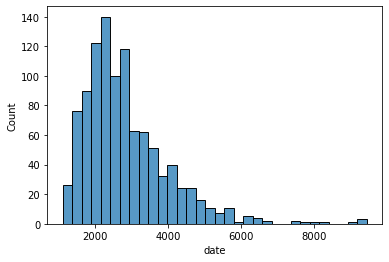

In [23]:
sns.histplot(date_value_counts);

In [24]:
target = df.item_cnt_day
target.head()

0    1.00
1    1.00
2   -1.00
3    1.00
4    1.00
Name: item_cnt_day, dtype: float64

In [25]:
target.unique()

array([   1.,   -1.,    3.,    2.,    4.,    5.,   13.,    7.,    6.,
          8.,   10.,   11.,   30.,   22.,   14.,   15.,    9.,   12.,
         17.,   19.,   20.,   -5.,   -6.,   -3.,   -2.,   16.,   64.,
         18.,   29.,   26.,   39.,   21.,   27.,   53.,   25.,   23.,
         24.,   40.,   28.,   31.,   36.,   -4.,   32.,   35.,   41.,
         88.,   44.,   52.,   56.,   38.,   34.,   57.,   69.,   37.,
         47.,   50.,   48.,   33.,   61.,   80.,   42.,   82.,  200.,
        100.,   76.,   77.,  107.,   46.,   49.,   70.,   55.,   60.,
         45.,   71.,   65.,  150.,   85.,   89.,   43.,   58.,  217.,
        104.,   84.,  168.,   92.,  156.,   68.,   62.,  264.,  110.,
         83.,  133.,   51.,  148.,   54.,   67.,  106.,  109.,  102.,
         90.,  288.,  171.,  131.,   87.,   78.,  151.,   59.,  113.,
        118.,  127.,   97.,  135.,  -22.,  103.,  111.,   96.,  242.,
        105.,   72.,  126.,   73.,  101.,   91.,   63.,  194.,  255.,
         98.,   81.,

In [26]:
target.head()

0    1.00
1    1.00
2   -1.00
3    1.00
4    1.00
Name: item_cnt_day, dtype: float64

In [27]:
target_value_counts = target.value_counts()

In [28]:
target_value_counts

1.00      2629372
2.00       194201
3.00        47350
4.00        19685
5.00        10474
           ...   
179.00          1
187.00          1
194.00          1
195.00          1
508.00          1
Name: item_cnt_day, Length: 198, dtype: int64

In [29]:
df.head(1)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00          1.00   

   item_category_id  
0                37

In [30]:
target.min()

-22.0

In [31]:
df.item_price.min()

-1.0

In [32]:
df['item_price'] = df['item_price'] + np.absolute(df.item_price.min()) + 1

In [33]:
df.item_price.min()

1.0

In [34]:
target = target + np.absolute(target) + 1

In [35]:
target.min()

1.0

In [36]:
log_target = np.log(target)
log_item_price = np.log(df.item_price)

In [37]:
df.head(1)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154    1,001.00          1.00   

   item_category_id  
0                37

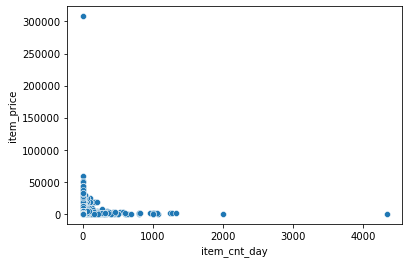

In [38]:
sns.scatterplot(x=target, y=df.item_price);

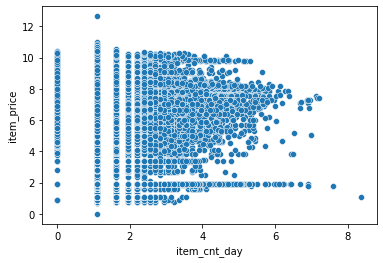

In [39]:
sns.scatterplot(x=log_target, y=log_item_price);

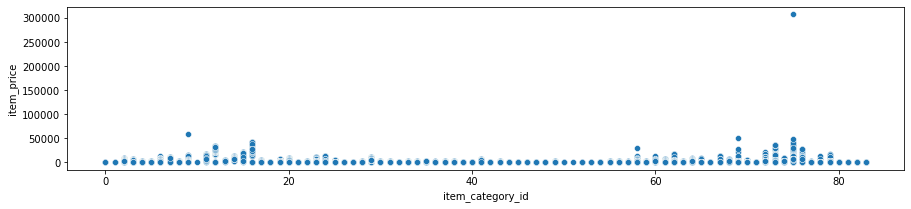

In [40]:
plt.figure(figsize=(15, 3))
sns.scatterplot(x=df.item_category_id, y=df.item_price);

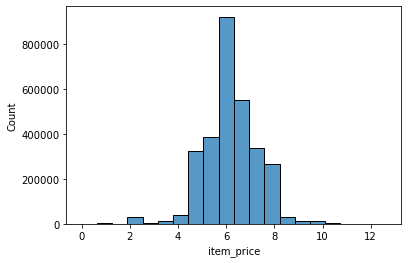

In [41]:
sns.histplot(np.log(df.item_price), bins=20);

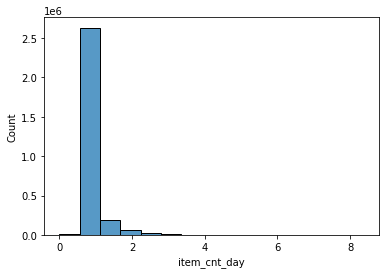

In [42]:
sns.histplot(log_target, bins=15);

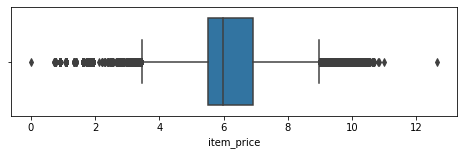

In [43]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=np.log(df.item_price));

# Analyzing time series

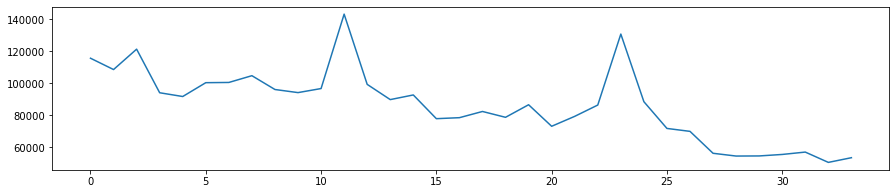

In [44]:
plt.figure(figsize=(15, 3))
sns.lineplot(x=date_block_value_counts.index, y=date_block_value_counts.values);

The time series above shows decreasing trend and seasonality

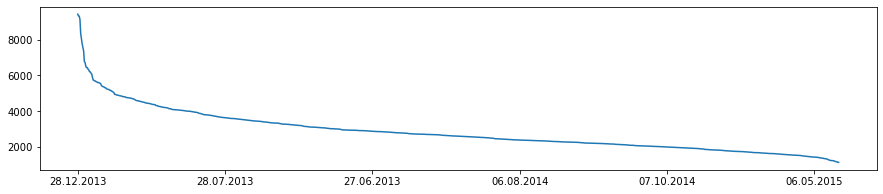

In [45]:
plt.figure(figsize=(15, 3))
date_value_counts.plot();

In [46]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154    1,001.00          1.00   
1  03.01.2013               0       25     2552      901.00          1.00   
2  05.01.2013               0       25     2552      901.00         -1.00   
3  06.01.2013               0       25     2554    1,711.05          1.00   
4  15.01.2013               0       25     2555    1,101.00          1.00   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

In [47]:
item_cnt_month = df.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({'item_cnt_day': 'sum'})

In [48]:
item_cnt_month = item_cnt_month.rename({'item_cnt_day': 'item_cnt_month'}, axis=1)

In [49]:
item_cnt_month.head()

date_block_num  shop_id  item_id  item_cnt_month
0               0        0       32            6.00
1               0        0       33            3.00
2               0        0       35            1.00
3               0        0       43            1.00
4               0        0       51            2.00

In [50]:
item_cnt_month.item_id.nunique()

21807

In [51]:
test_df.shape

(214200, 3)

In [52]:
len(set(test_df.item_id))

5100

In [53]:
len(set(df.item_id))

21807

In [54]:
len(set(test_df.item_id).intersection(set(item_cnt_month.item_id)))

4737

In [55]:
test_df.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [56]:
sample_submission.head()

ID  item_cnt_month
0   0            0.50
1   1            0.50
2   2            0.50
3   3            0.50
4   4            0.50

In [57]:
items.head()

item_id  item_category_id
0        0                40
1        1                76
2        2                40
3        3                40
4        4                40

In [58]:
len(set(items.item_id).intersection(set(test_df.item_id)))

5100

In [59]:
len(set(items.item_category_id))

84

In [60]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154    1,001.00          1.00   
1  03.01.2013               0       25     2552      901.00          1.00   
2  05.01.2013               0       25     2552      901.00         -1.00   
3  06.01.2013               0       25     2554    1,711.05          1.00   
4  15.01.2013               0       25     2555    1,101.00          1.00   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

In [61]:
df_grouped_item_category = df.groupby(['item_category_id', 'date_block_num'], as_index=False).agg({'item_cnt_day': 'sum'}). \
                                        rename({'item_cnt_day': 'item_cnt_month'}, axis=1)

In [62]:
df_grouped_item_category.head()

item_category_id  date_block_num  item_cnt_month
0                 0               0            1.00
1                 0               1            1.00
2                 0               3            1.00
3                 1               0            1.00
4                 1               1            1.00

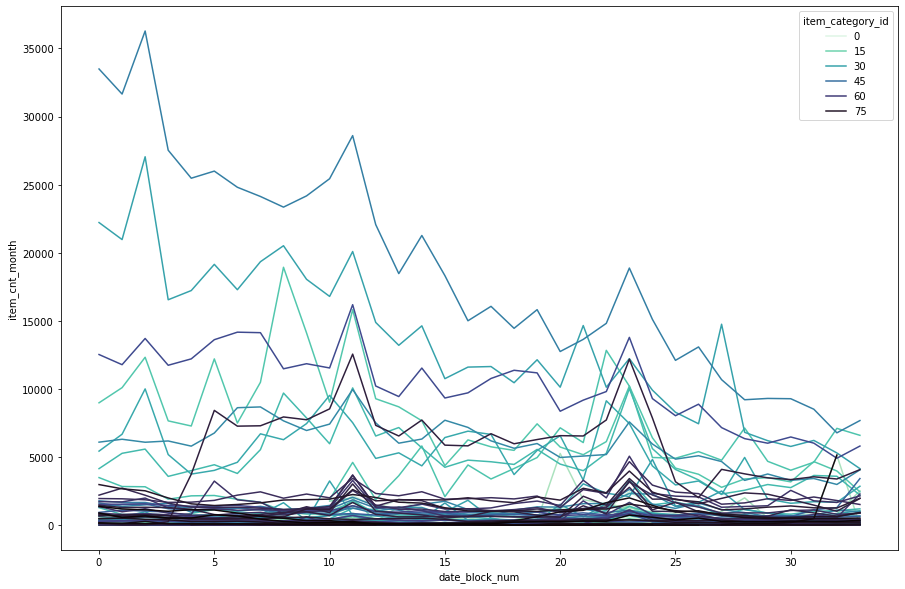

In [63]:
plt.figure(figsize=(15, 10))
palette_1 = sns.color_palette("mako_r", as_cmap=True)

sns.lineplot(x='date_block_num', y='item_cnt_month', data=df_grouped_item_category,
             hue='item_category_id', palette=palette_1);

In [64]:
df_grouped_item_category.head()

item_category_id  date_block_num  item_cnt_month
0                 0               0            1.00
1                 0               1            1.00
2                 0               3            1.00
3                 1               0            1.00
4                 1               1            1.00

In [65]:
df_grouped_item_category.item_cnt_month.describe()

count    2,077.00
mean     1,756.48
std      3,669.11
min         -1.00
25%        145.00
50%        514.00
75%      1,323.00
max     36,277.00
Name: item_cnt_month, dtype: float64

In [66]:
df_grouped_item_category['log_item_cnt_month'] = np.log(df_grouped_item_category['item_cnt_month'] + 2)

In [67]:
df_grouped_item_category.head()

item_category_id  date_block_num  item_cnt_month  log_item_cnt_month
0                 0               0            1.00                1.10
1                 0               1            1.00                1.10
2                 0               3            1.00                1.10
3                 1               0            1.00                1.10
4                 1               1            1.00                1.10

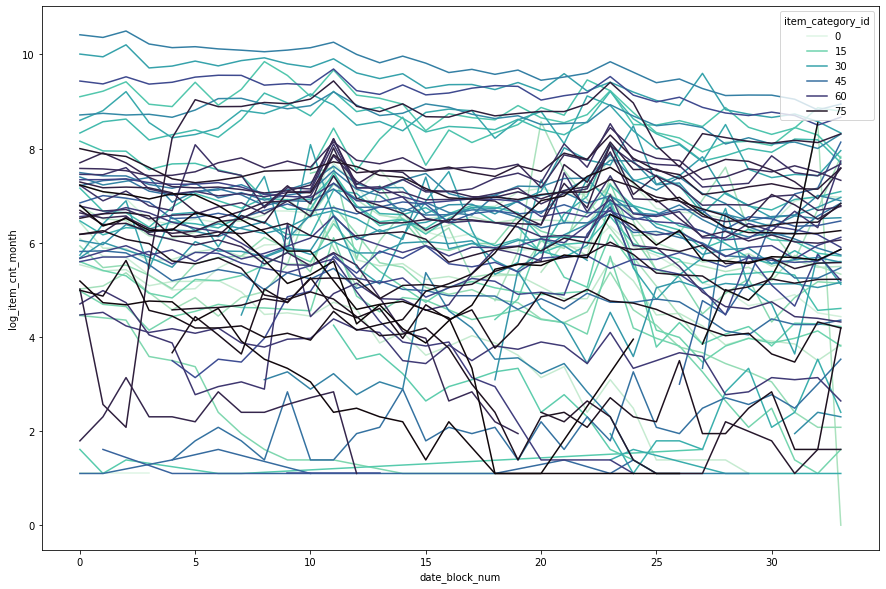

In [68]:
plt.figure(figsize=(15, 10))

sns.lineplot(x='date_block_num', y='log_item_cnt_month', data=df_grouped_item_category,
             hue='item_category_id', palette=palette_1);

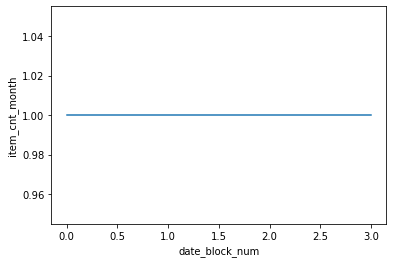

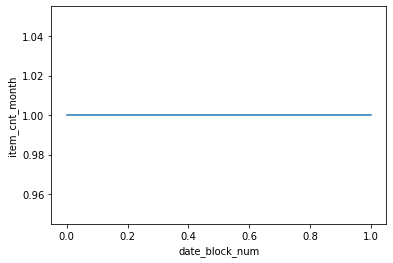

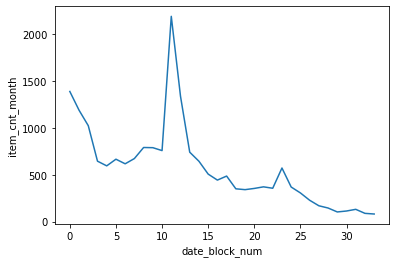

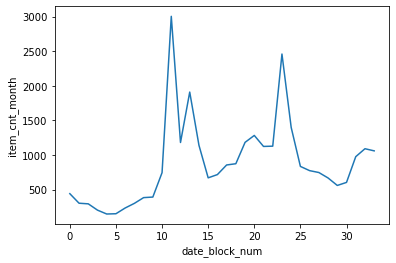

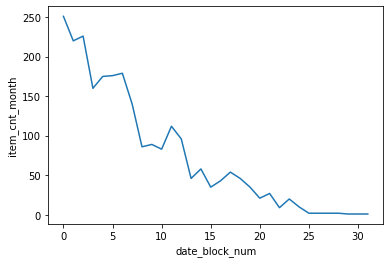

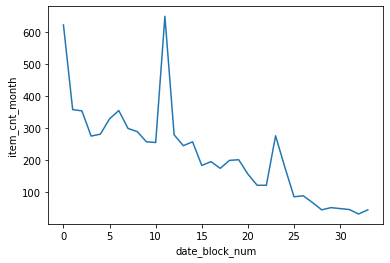

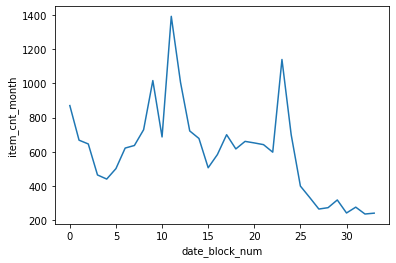

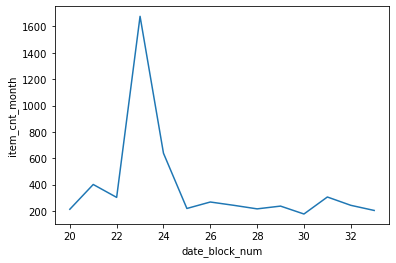

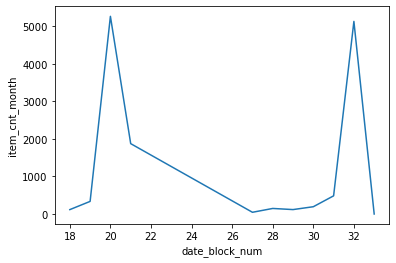

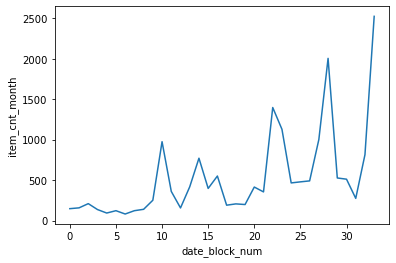

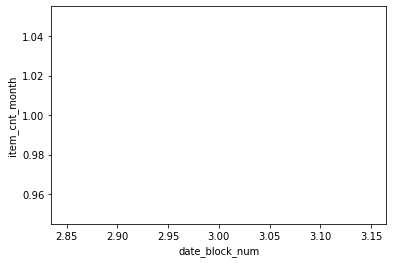

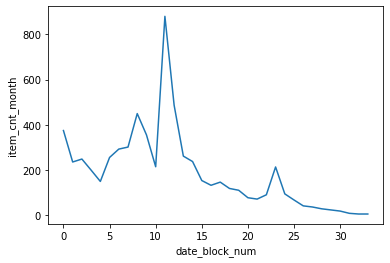

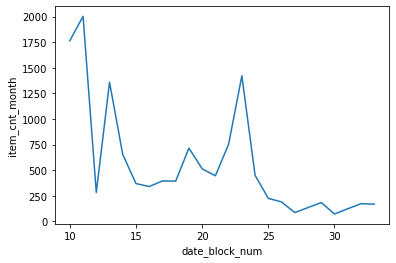

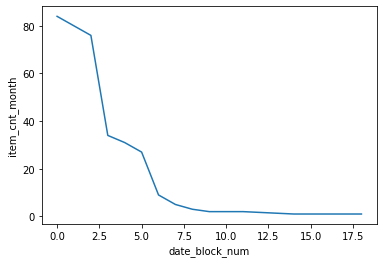

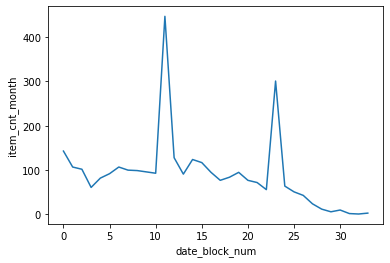

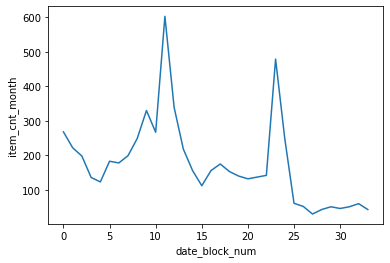

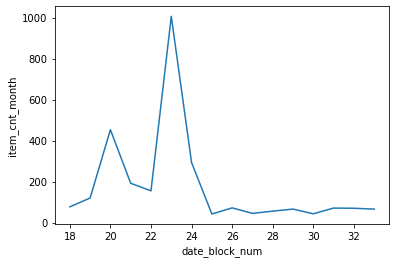

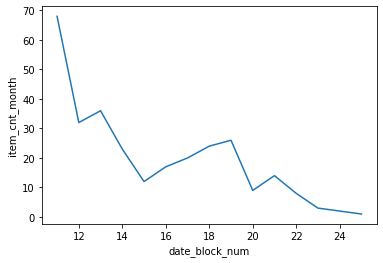

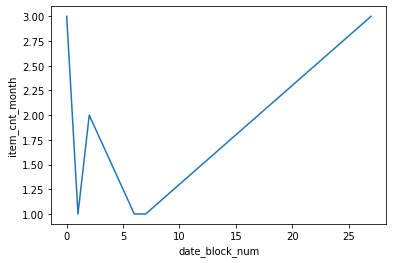

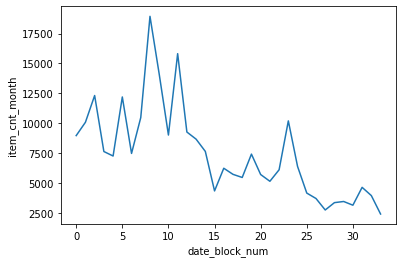

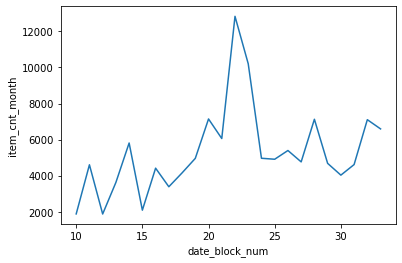

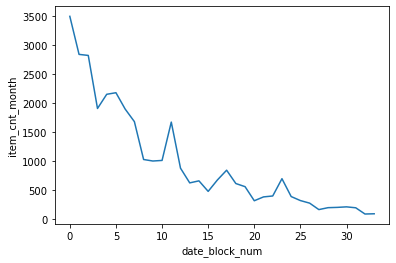

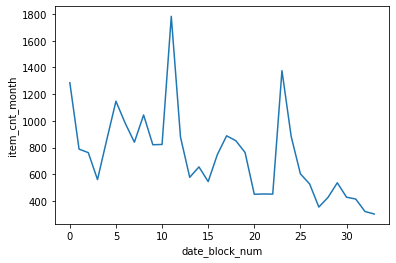

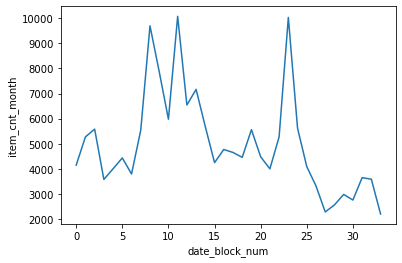

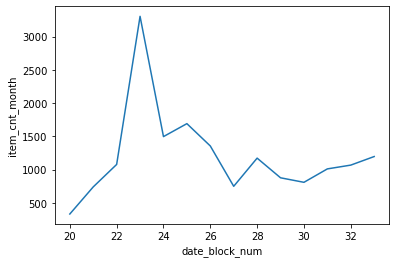

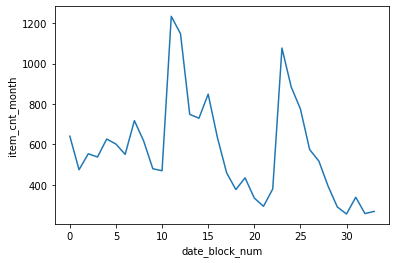

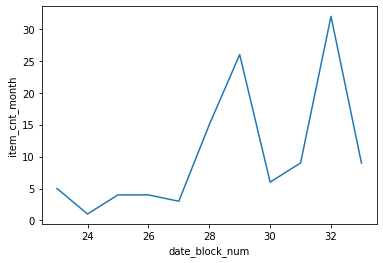

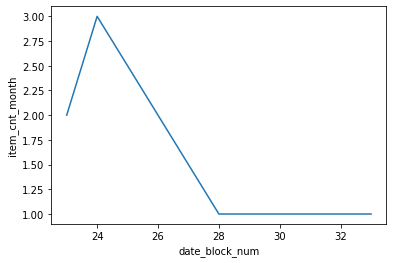

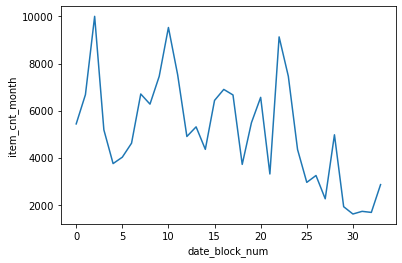

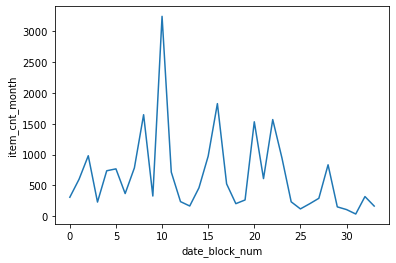

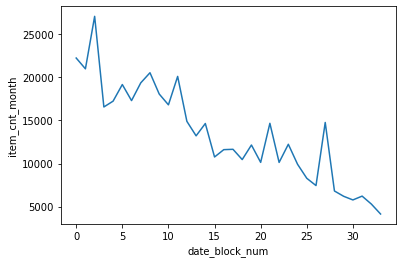

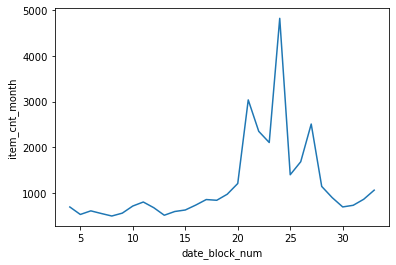

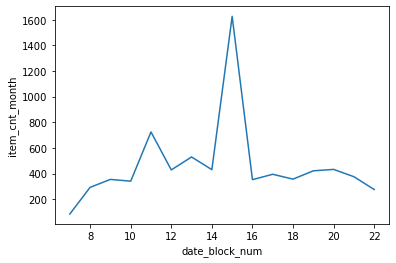

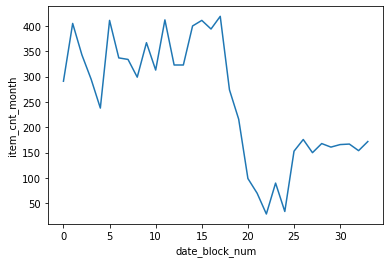

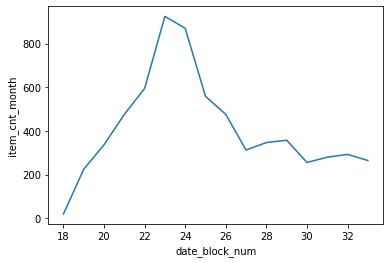

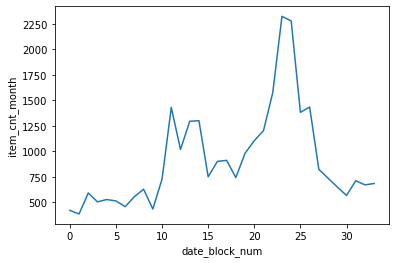

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [71]:
for item_category in item_categories:
    
    sns.lineplot(x='date_block_num', y='item_cnt_month',
                 data=df_grouped_item_category[df_grouped_item_category.item_category_id == item_category]);
    plt.show()

In [69]:
item_categories = set(df_grouped_item_category.item_category_id)

In [72]:
def print_info_for_item_category(data, item_category_id):
    
    item_category_data = data[data.item_category_id == item_category_id]
    
    item_date_blocks = set(item_category_data.date_block_num)
    date_blocks = set(data.date_block_num)
    missing_date_blocks = sorted(date_blocks.difference(item_date_blocks))
    
    print('\n', 'CNT_MONTH DESCRIPTION: ', item_category_data['item_cnt_month'].describe())
    
    print('\n', 'MISSING VALUES: ', missing_date_blocks)

ITEM CATEGORY_ID:  0


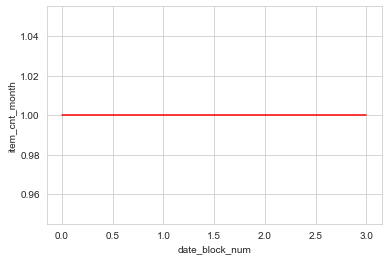


 CNT_MONTH DESCRIPTION:  count   3.00
mean    1.00
std     0.00
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


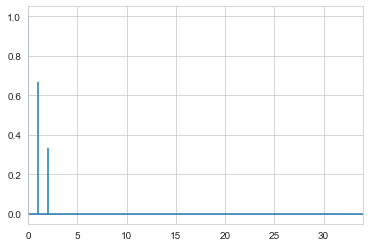


 LOG ITEM CNT MONTH:


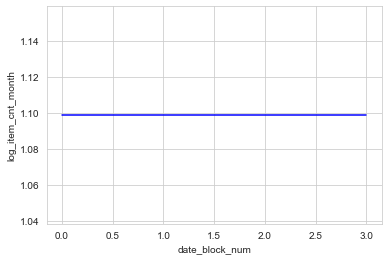


AUTOCORRELATION FOR LOG DATA: 


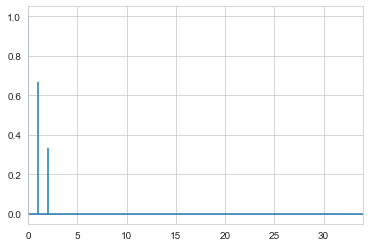

ITEM CATEGORY_ID:  1


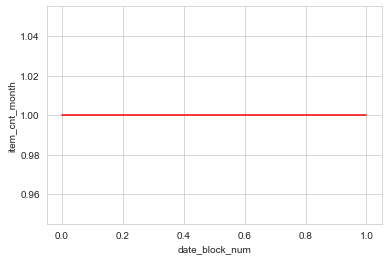


 CNT_MONTH DESCRIPTION:  count   2.00
mean    1.00
std     0.00
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 

 LOG ITEM CNT MONTH:


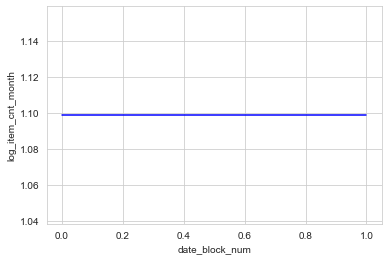


AUTOCORRELATION FOR LOG DATA: 
ITEM CATEGORY_ID:  2


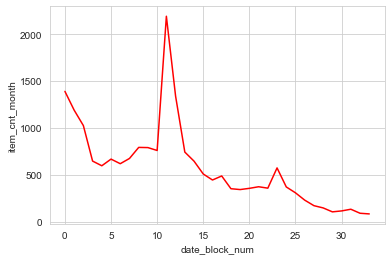


 CNT_MONTH DESCRIPTION:  count      34.00
mean      576.38
std       446.92
min        82.00
25%       315.75
50%       497.50
75%       725.00
max     2,192.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


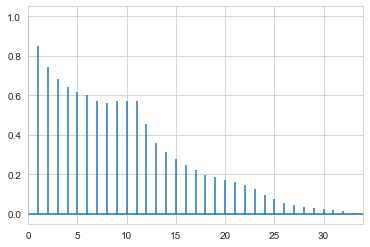


 LOG ITEM CNT MONTH:


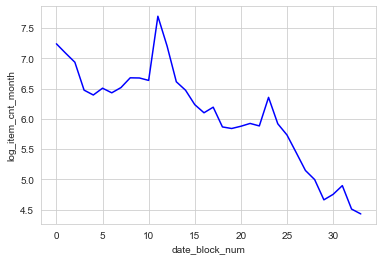


AUTOCORRELATION FOR LOG DATA: 


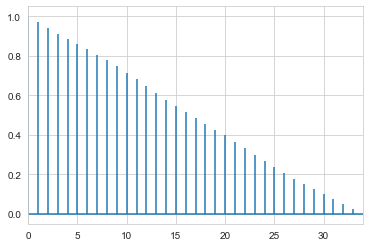

ITEM CATEGORY_ID:  3


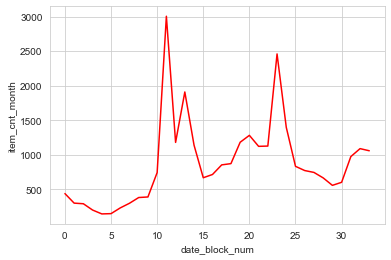


 CNT_MONTH DESCRIPTION:  count      34.00
mean      876.68
std       626.17
min       146.00
25%       403.25
50%       759.50
75%     1,126.00
max     3,004.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


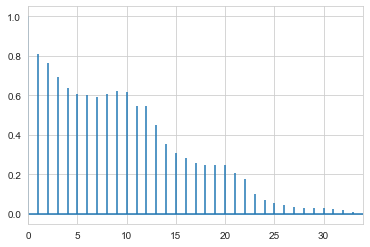


 LOG ITEM CNT MONTH:


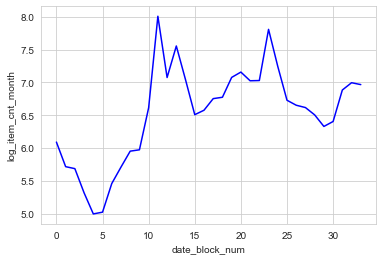


AUTOCORRELATION FOR LOG DATA: 


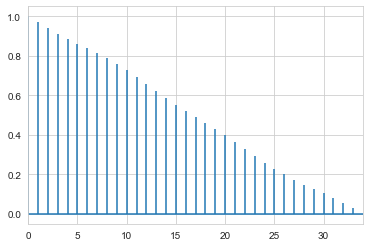

ITEM CATEGORY_ID:  4


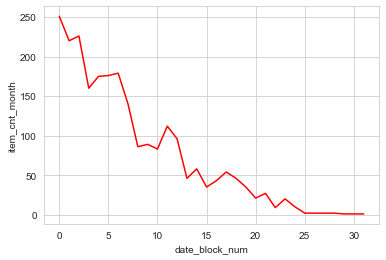


 CNT_MONTH DESCRIPTION:  count    31.00
mean     77.65
std      76.37
min       1.00
25%      15.00
50%      46.00
75%     126.00
max     251.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [30, 32, 33]

AUTOCORRELATION: 


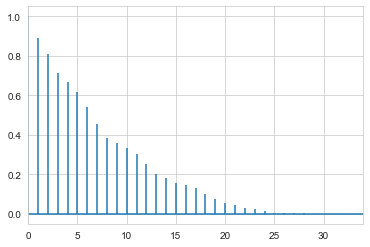


 LOG ITEM CNT MONTH:


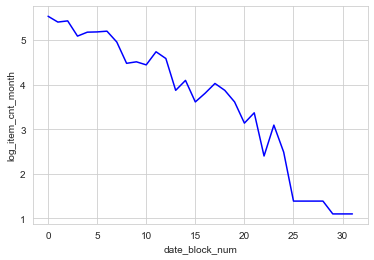


AUTOCORRELATION FOR LOG DATA: 


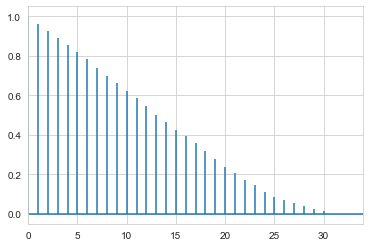

ITEM CATEGORY_ID:  5


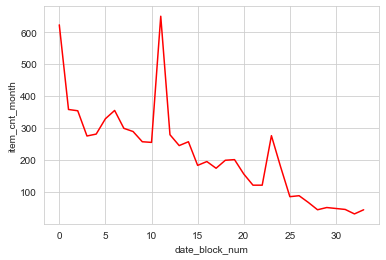


 CNT_MONTH DESCRIPTION:  count    34.00
mean    218.03
std     147.62
min      31.00
25%      96.25
50%     200.00
75%     280.50
max     650.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


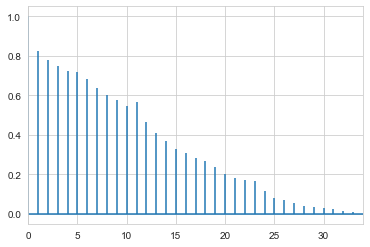


 LOG ITEM CNT MONTH:


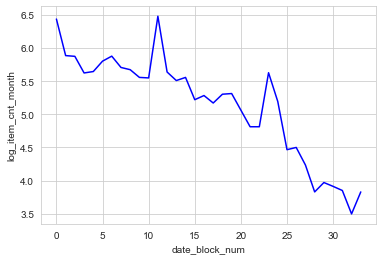


AUTOCORRELATION FOR LOG DATA: 


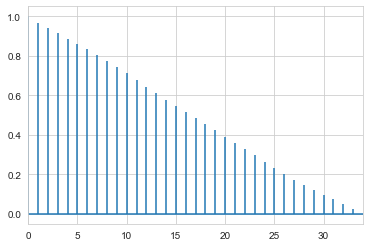

ITEM CATEGORY_ID:  6


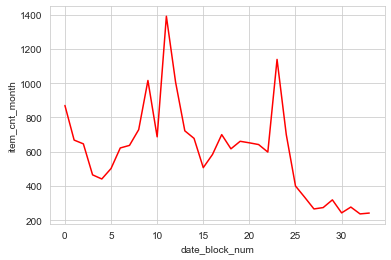


 CNT_MONTH DESCRIPTION:  count      34.00
mean      602.12
std       268.01
min       237.00
25%       410.25
50%       629.50
75%       696.75
max     1,391.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


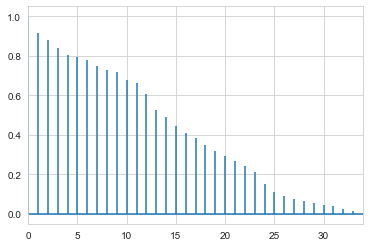


 LOG ITEM CNT MONTH:


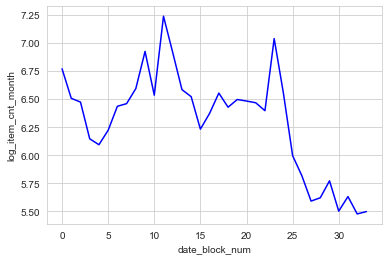


AUTOCORRELATION FOR LOG DATA: 


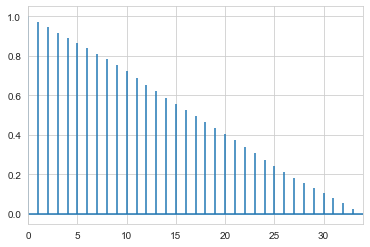

ITEM CATEGORY_ID:  7


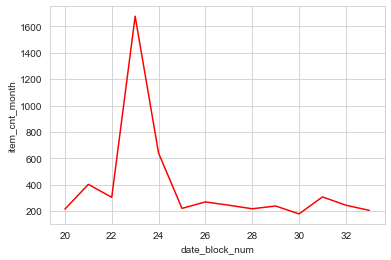


 CNT_MONTH DESCRIPTION:  count      14.00
mean      382.71
std       390.40
min       178.00
25%       217.75
50%       244.00
75%       306.25
max     1,677.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

AUTOCORRELATION: 


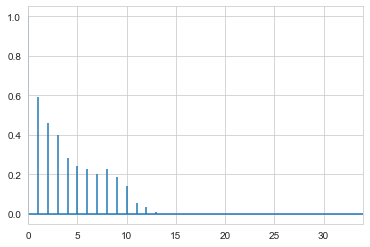


 LOG ITEM CNT MONTH:


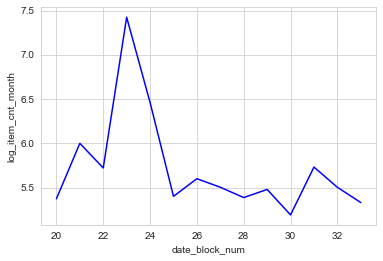


AUTOCORRELATION FOR LOG DATA: 


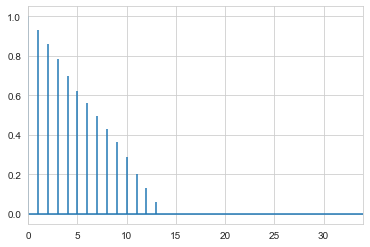

ITEM CATEGORY_ID:  8


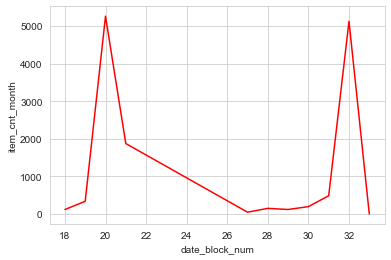


 CNT_MONTH DESCRIPTION:  count      11.00
mean    1,245.36
std     2,021.81
min        -1.00
25%       116.50
50%       193.00
75%     1,178.00
max     5,263.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26]

AUTOCORRELATION: 


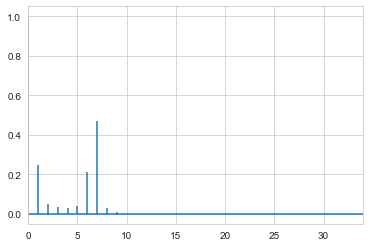


 LOG ITEM CNT MONTH:


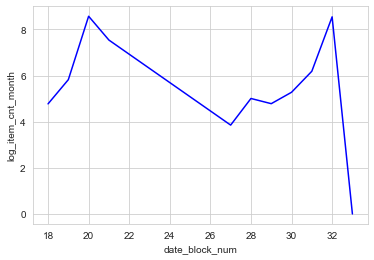


AUTOCORRELATION FOR LOG DATA: 


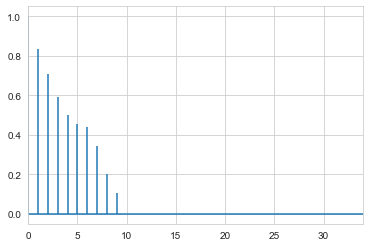

ITEM CATEGORY_ID:  9


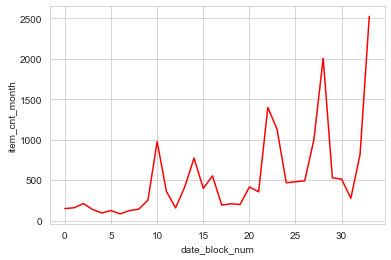


 CNT_MONTH DESCRIPTION:  count      34.00
mean      532.88
std       549.13
min        83.00
25%       167.25
50%       380.50
75%       546.00
max     2,524.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


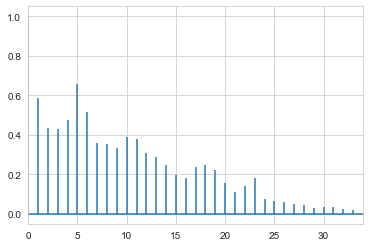


 LOG ITEM CNT MONTH:


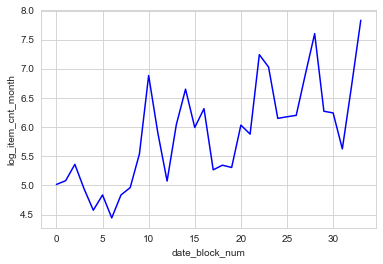


AUTOCORRELATION FOR LOG DATA: 


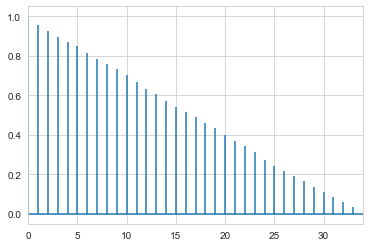

ITEM CATEGORY_ID:  10


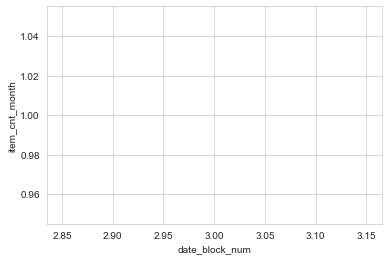


 CNT_MONTH DESCRIPTION:  count   1.00
mean    1.00
std      nan
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     1.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 

 LOG ITEM CNT MONTH:


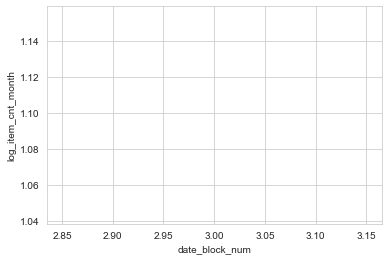


AUTOCORRELATION FOR LOG DATA: 
ITEM CATEGORY_ID:  11


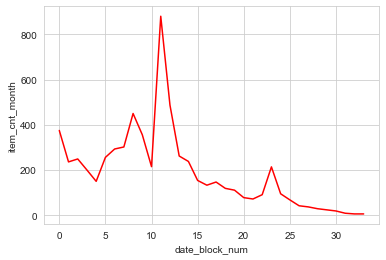


 CNT_MONTH DESCRIPTION:  count    34.00
mean    188.32
std     177.82
min       6.00
25%      69.00
50%     148.50
75%     254.25
max     880.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


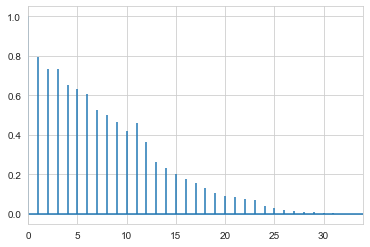


 LOG ITEM CNT MONTH:


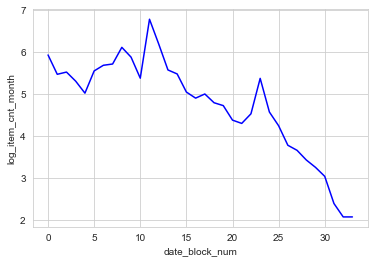


AUTOCORRELATION FOR LOG DATA: 


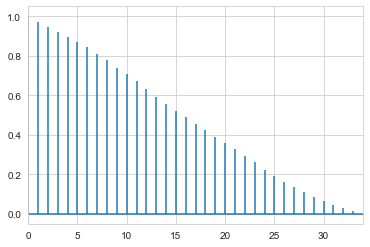

ITEM CATEGORY_ID:  12


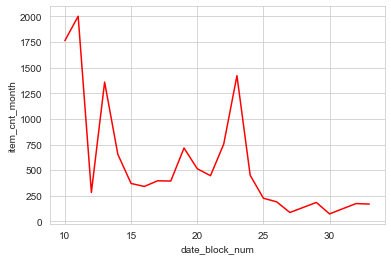


 CNT_MONTH DESCRIPTION:  count      24.00
mean      551.25
std       541.45
min        73.00
25%       182.25
50%       382.00
75%       669.50
max     2,002.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

AUTOCORRELATION: 


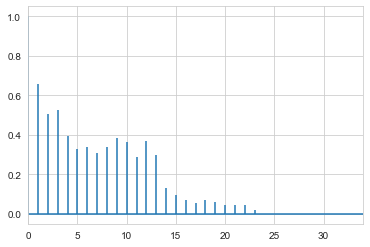


 LOG ITEM CNT MONTH:


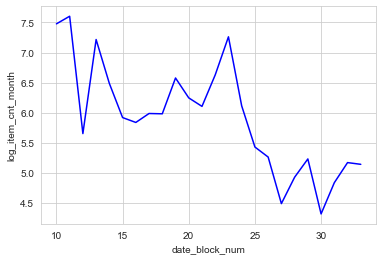


AUTOCORRELATION FOR LOG DATA: 


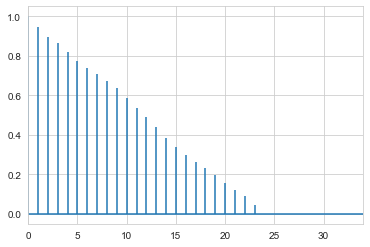

ITEM CATEGORY_ID:  13


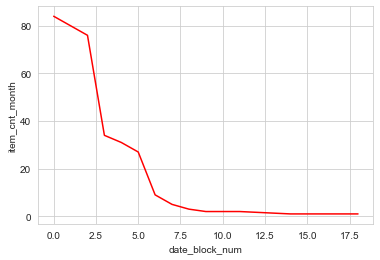


 CNT_MONTH DESCRIPTION:  count   15.00
mean    23.80
std     31.29
min      1.00
25%      1.50
50%      5.00
75%     32.50
max     84.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [10, 12, 13, 15, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


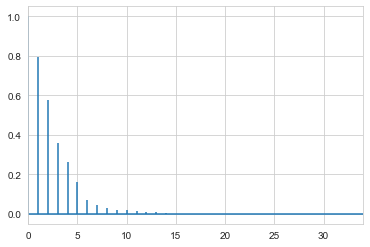


 LOG ITEM CNT MONTH:


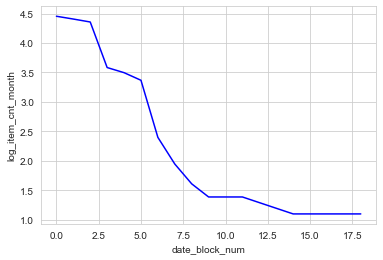


AUTOCORRELATION FOR LOG DATA: 


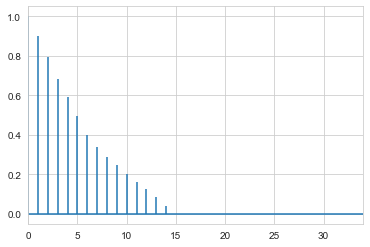

ITEM CATEGORY_ID:  14


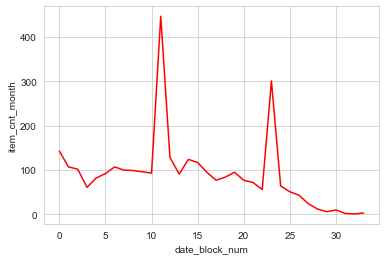


 CNT_MONTH DESCRIPTION:  count    34.00
mean     90.06
std      84.10
min       1.00
25%      52.25
50%      87.50
75%     101.50
max     447.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


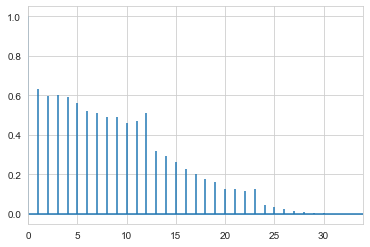


 LOG ITEM CNT MONTH:


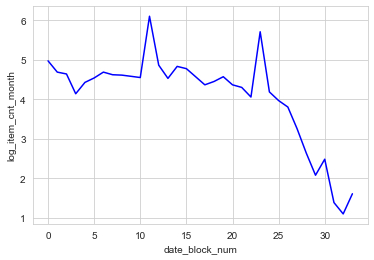


AUTOCORRELATION FOR LOG DATA: 


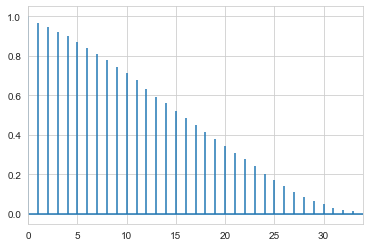

ITEM CATEGORY_ID:  15


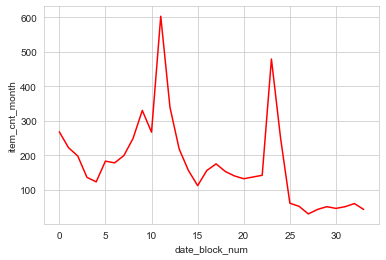


 CNT_MONTH DESCRIPTION:  count    34.00
mean    175.88
std     125.44
min      30.00
25%      73.75
50%     154.50
75%     221.00
max     603.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  []

AUTOCORRELATION: 


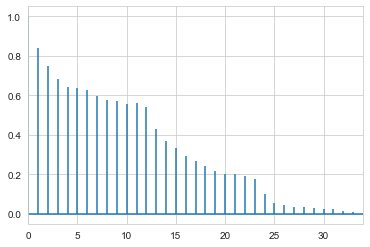


 LOG ITEM CNT MONTH:


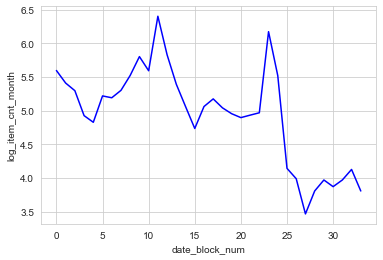


AUTOCORRELATION FOR LOG DATA: 


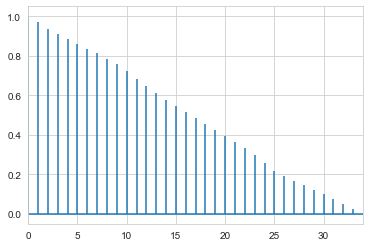

ITEM CATEGORY_ID:  16


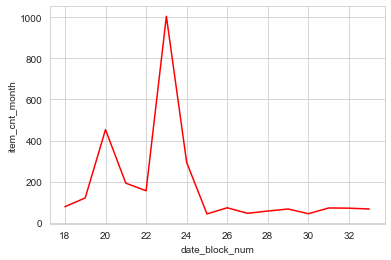


 CNT_MONTH DESCRIPTION:  count      16.00
mean      176.69
std       247.31
min        42.00
25%        63.50
50%        71.50
75%       164.25
max     1,006.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

AUTOCORRELATION: 


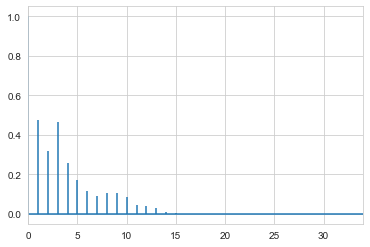


 LOG ITEM CNT MONTH:


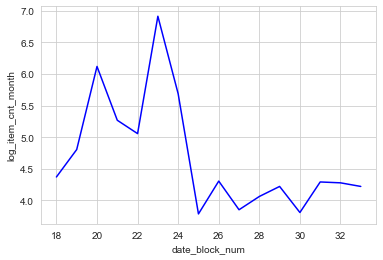


AUTOCORRELATION FOR LOG DATA: 


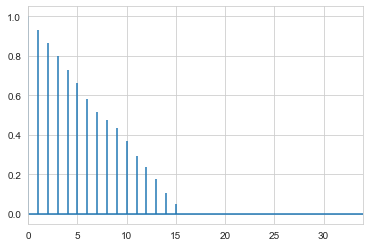

ITEM CATEGORY_ID:  17


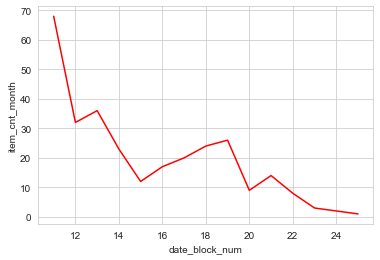


 CNT_MONTH DESCRIPTION:  count   15.00
mean    19.67
std     17.14
min      1.00
25%      8.50
50%     17.00
75%     25.00
max     68.00
Name: item_cnt_month, dtype: float64

 MISSING VALUES:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 26, 27, 28, 29, 30, 31, 32, 33]

AUTOCORRELATION: 


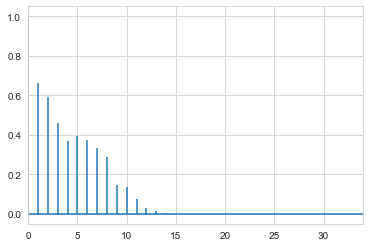


 LOG ITEM CNT MONTH:


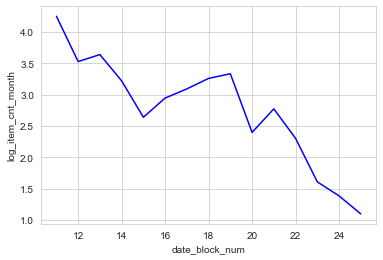


AUTOCORRELATION FOR LOG DATA: 


KeyboardInterrupt: 

In [73]:
for item_category in item_categories:
    sns.set_style("whitegrid")

    print('='*100, '\nITEM CATEGORY_ID: ', item_category)
    
    sns.lineplot(x='date_block_num', y='item_cnt_month',
                 data=df_grouped_item_category[df_grouped_item_category.item_category_id == item_category],
                 color="red");
    plt.show()

    print_info_for_item_category(df_grouped_item_category, item_category)
    
    print('\nAUTOCORRELATION: ')
    item_category_cnt_month_data = df_grouped_item_category.loc[df_grouped_item_category.item_category_id == item_category, 'item_cnt_month']
    if (item_category_cnt_month_data.size > 2): 
        plt.acorr(item_category_cnt_month_data, maxlags=None)
        plt.xlim([0, 34])
        plt.show()
        

    print('\n LOG ITEM CNT MONTH:')
    sns.lineplot(x='date_block_num', y='log_item_cnt_month', 
                 data=df_grouped_item_category[df_grouped_item_category.item_category_id == item_category],
                    color='blue');
    plt.show()
    
    print('\nAUTOCORRELATION FOR LOG DATA: ')
    log_item_category_cnt_month_data = df_grouped_item_category.loc[df_grouped_item_category.item_category_id == item_category, 'log_item_cnt_month']
    if (item_category_cnt_month_data.size > 2):
        plt.acorr(log_item_category_cnt_month_data, maxlags=None)
        plt.xlim([0, 34])
        plt.show()
    
    
    

In [74]:
date_blocks = set(df.date_block_num)
len(date_blocks)

34

In [75]:
df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154    1,001.00          1.00   
1  03.01.2013               0       25     2552      901.00          1.00   
2  05.01.2013               0       25     2552      901.00         -1.00   
3  06.01.2013               0       25     2554    1,711.05          1.00   
4  15.01.2013               0       25     2555    1,101.00          1.00   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

In [76]:
data = df.groupby(['item_id', 'shop_id', 'date_block_num'], as_index=False).agg({'item_cnt_day': 'sum'})
data = data.rename({'item_cnt_day': 'item_cnt_month'}, axis=1)

In [77]:
data = data.join(items.set_index('item_id'), on='item_id')

In [78]:
data.head()

item_id  shop_id  date_block_num  item_cnt_month  item_category_id
0        0       54              20            1.00                40
1        1       55              15            2.00                76
2        1       55              18            1.00                76
3        1       55              19            1.00                76
4        1       55              20            1.00                76

In [80]:
shops = set(data.shop_id)

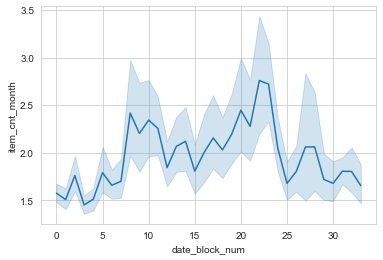

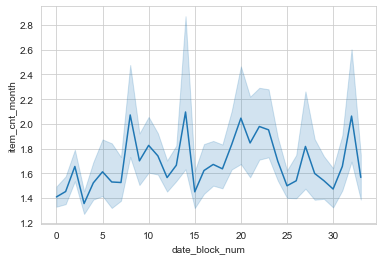

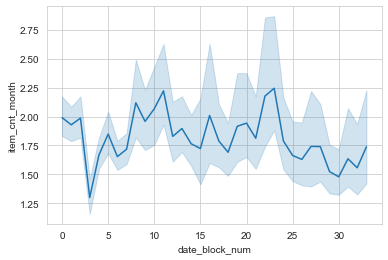

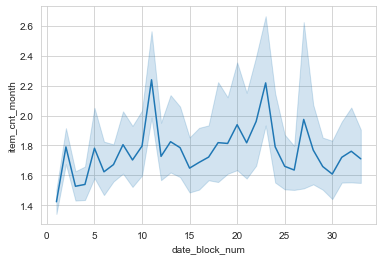

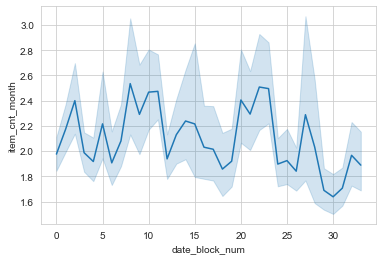

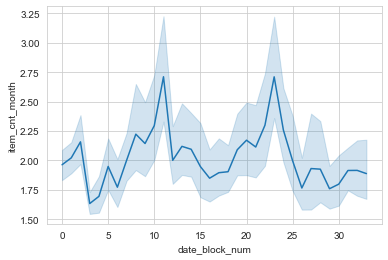

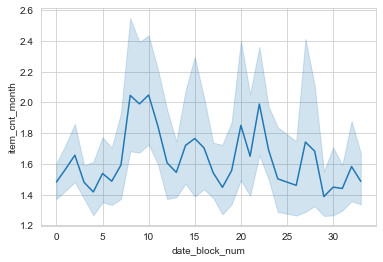

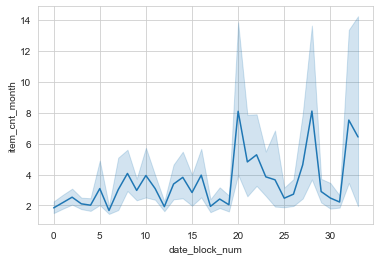

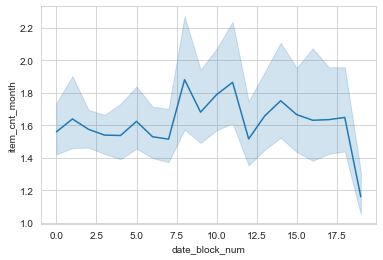

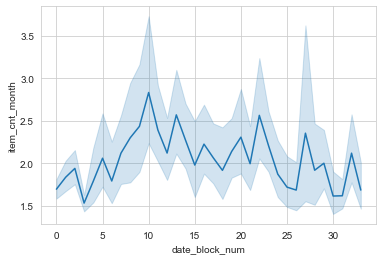

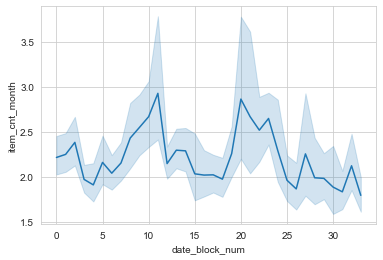

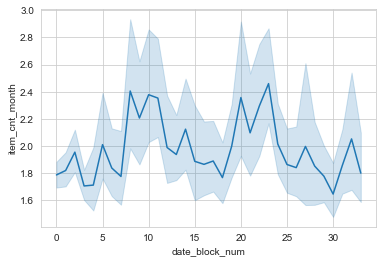

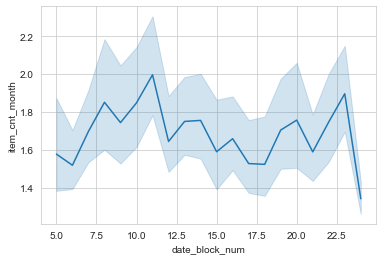

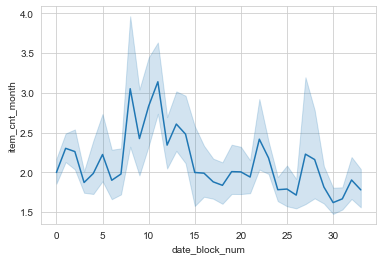

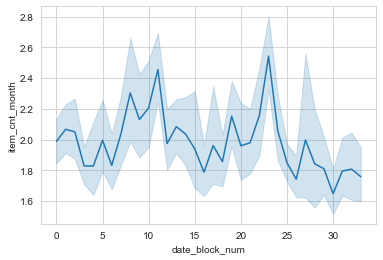

KeyboardInterrupt: 

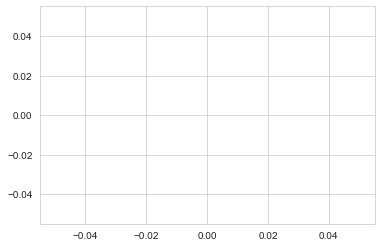

In [97]:
for shop_id in shops:
    
    shop_sell_data = data.loc[data.shop_id == shop_id]
    
    sns.lineplot(data=shop_sell_data, x='date_block_num', y='item_cnt_month')
    plt.show()
    

In [81]:
data['log_item_cnt_month'] = np.log(data.item_cnt_month + abs(data.item_cnt_month.min()) + 1)

In [82]:
data.head()

item_id  shop_id  date_block_num  item_cnt_month  item_category_id  \
0        0       54              20            1.00                40   
1        1       55              15            2.00                76   
2        1       55              18            1.00                76   
3        1       55              19            1.00                76   
4        1       55              20            1.00                76   

   log_item_cnt_month  
0                3.18  
1                3.22  
2                3.18  
3                3.18  
4                3.18

In [146]:
shops_to_drop = set()

for shop_id in shops:
    if data.loc[data.shop_id == shop_id, 'date_block_num'].max() < 33:
        shops_to_drop.add(shop_id)

In [147]:
shops_to_drop

{13, 17, 27, 29, 30, 43, 51, 54}

In [148]:
np.intersect1d(test_df.shop_id, pd.Series(list(shops_to_drop)))

array([], dtype=int64)

I will drop all shops where we have data only about 14 or les month

In [149]:
test_df[test_df.shop_id == 36].shape

(5100, 3)

In [150]:
shops_to_drop

{13, 17, 27, 29, 30, 43, 51, 54}

In [151]:
data[data.shop_id == 36].describe()

item_id  shop_id  date_block_num  item_cnt_month  item_category_id  \
count     0.00     0.00            0.00            0.00              0.00   
mean       nan      nan             nan             nan               nan   
std        nan      nan             nan             nan               nan   
min        nan      nan             nan             nan               nan   
25%        nan      nan             nan             nan               nan   
50%        nan      nan             nan             nan               nan   
75%        nan      nan             nan             nan               nan   
max        nan      nan             nan             nan               nan   

       log_item_cnt_month  
count                0.00  
mean                  nan  
std                   nan  
min                   nan  
25%                   nan  
50%                   nan  
75%                   nan  
max                   nan

In test data we have shop with id 36 which in train data has records only in the last month

In [152]:
data.shape

(1579810, 6)

In [153]:
for shop_id in shops_to_drop:
    data = data.drop(data[data.shop_id == shop_id].index)

In [154]:
data.shape

(1323537, 6)

In [155]:
1609124 - 1580068

29056

SHOP ID:  2


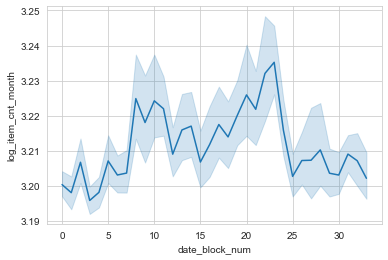

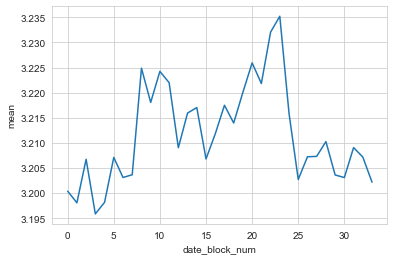

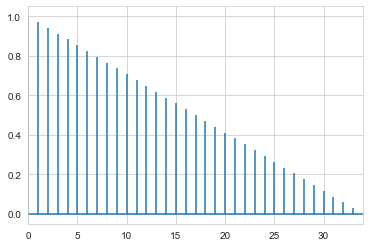

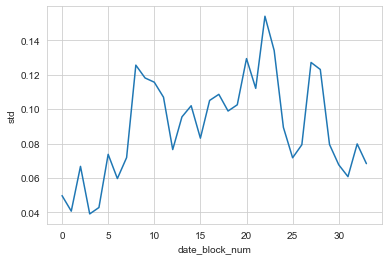

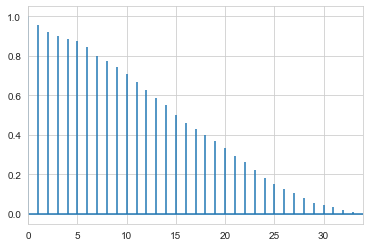

                mean  std
date_block_num           
0               3.20 0.05
1               3.20 0.04
2               3.21 0.07
3               3.20 0.04
4               3.20 0.04
5               3.21 0.07
6               3.20 0.06
7               3.20 0.07
8               3.22 0.13
9               3.22 0.12
10              3.22 0.12
11              3.22 0.11
12              3.21 0.08
13              3.22 0.10
14              3.22 0.10
15              3.21 0.08
16              3.21 0.11
17              3.22 0.11
18              3.21 0.10
19              3.22 0.10
20              3.23 0.13
21              3.22 0.11
22              3.23 0.15
23              3.24 0.13
24              3.22 0.09
25              3.20 0.07
26              3.21 0.08
27              3.21 0.13
28              3.21 0.12
29              3.20 0.08
30              3.20 0.07
31              3.21 0.06
32              3.21 0.08
33              3.20 0.07
SHOP ID:  3


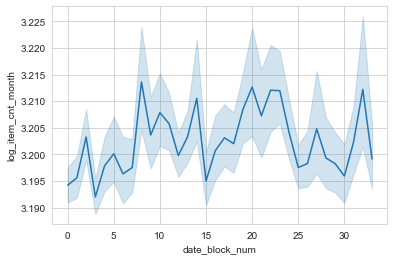

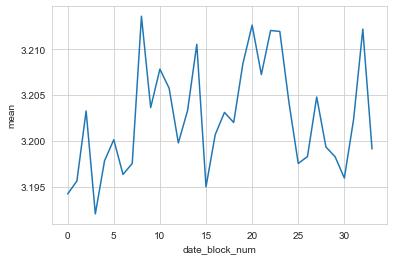

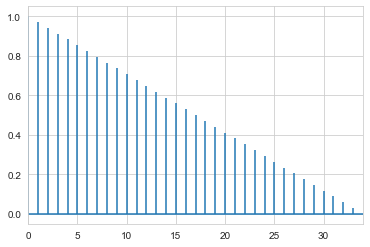

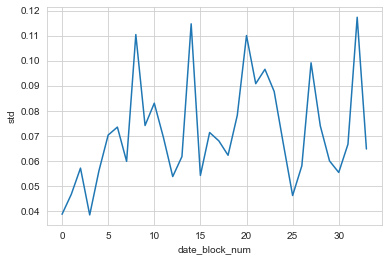

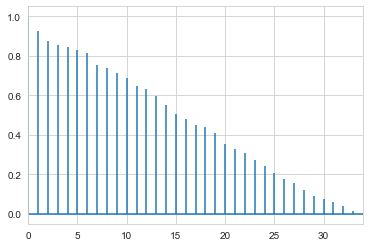

                mean  std
date_block_num           
0               3.19 0.04
1               3.20 0.05
2               3.20 0.06
3               3.19 0.04
4               3.20 0.06
5               3.20 0.07
6               3.20 0.07
7               3.20 0.06
8               3.21 0.11
9               3.20 0.07
10              3.21 0.08
11              3.21 0.07
12              3.20 0.05
13              3.20 0.06
14              3.21 0.11
15              3.19 0.05
16              3.20 0.07
17              3.20 0.07
18              3.20 0.06
19              3.21 0.08
20              3.21 0.11
21              3.21 0.09
22              3.21 0.10
23              3.21 0.09
24              3.20 0.07
25              3.20 0.05
26              3.20 0.06
27              3.20 0.10
28              3.20 0.07
29              3.20 0.06
30              3.20 0.06
31              3.20 0.07
32              3.21 0.12
33              3.20 0.06
SHOP ID:  4


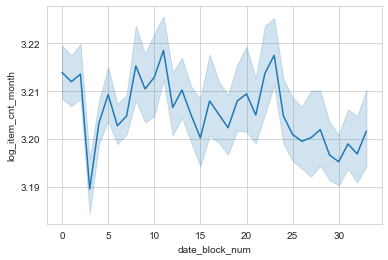

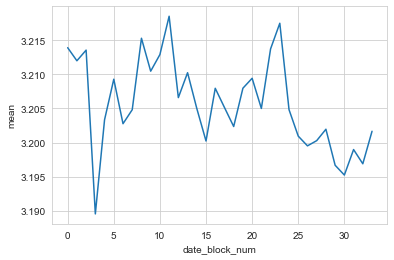

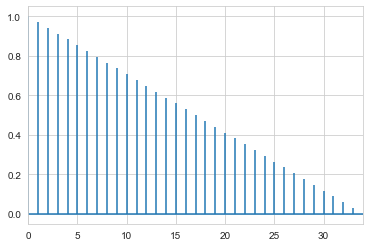

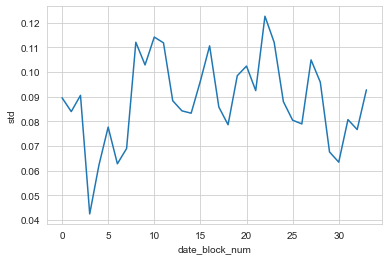

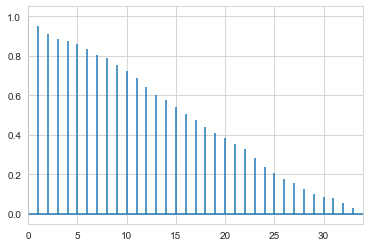

                mean  std
date_block_num           
0               3.21 0.09
1               3.21 0.08
2               3.21 0.09
3               3.19 0.04
4               3.20 0.06
5               3.21 0.08
6               3.20 0.06
7               3.20 0.07
8               3.22 0.11
9               3.21 0.10
10              3.21 0.11
11              3.22 0.11
12              3.21 0.09
13              3.21 0.08
14              3.21 0.08
15              3.20 0.10
16              3.21 0.11
17              3.21 0.09
18              3.20 0.08
19              3.21 0.10
20              3.21 0.10
21              3.21 0.09
22              3.21 0.12
23              3.22 0.11
24              3.20 0.09
25              3.20 0.08
26              3.20 0.08
27              3.20 0.10
28              3.20 0.10
29              3.20 0.07
30              3.20 0.06
31              3.20 0.08
32              3.20 0.08
33              3.20 0.09
SHOP ID:  5


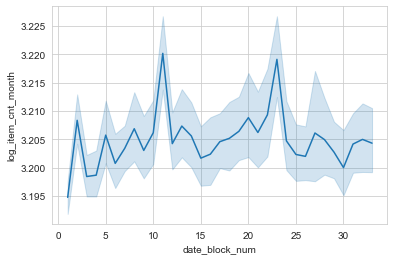

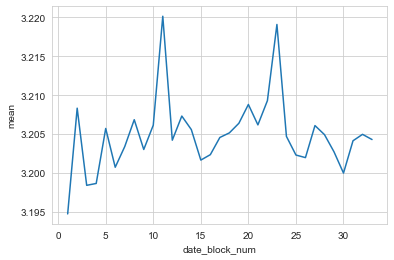

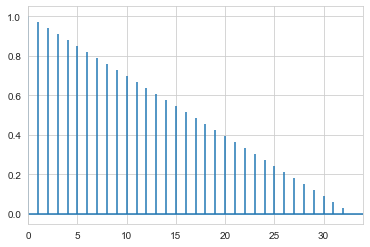

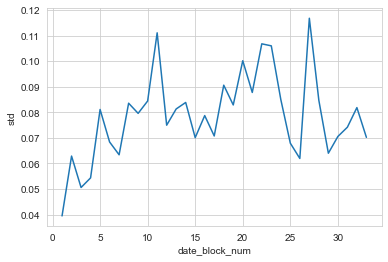

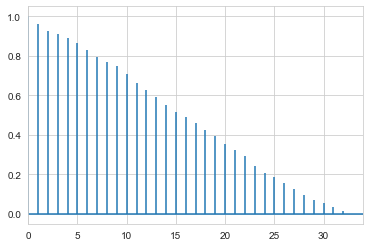

                mean  std
date_block_num           
1               3.19 0.04
2               3.21 0.06
3               3.20 0.05
4               3.20 0.05
5               3.21 0.08
6               3.20 0.07
7               3.20 0.06
8               3.21 0.08
9               3.20 0.08
10              3.21 0.08
11              3.22 0.11
12              3.20 0.07
13              3.21 0.08
14              3.21 0.08
15              3.20 0.07
16              3.20 0.08
17              3.20 0.07
18              3.21 0.09
19              3.21 0.08
20              3.21 0.10
21              3.21 0.09
22              3.21 0.11
23              3.22 0.11
24              3.20 0.08
25              3.20 0.07
26              3.20 0.06
27              3.21 0.12
28              3.20 0.08
29              3.20 0.06
30              3.20 0.07
31              3.20 0.07
32              3.20 0.08
33              3.20 0.07
SHOP ID:  6


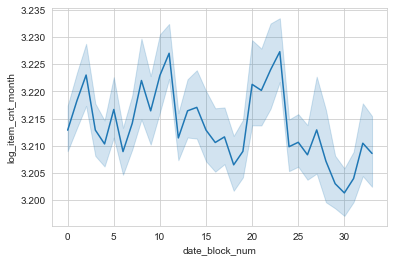

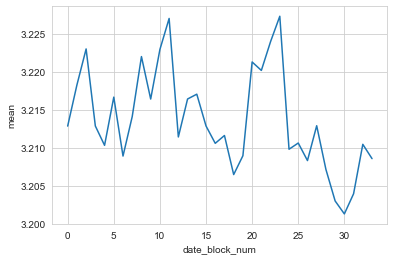

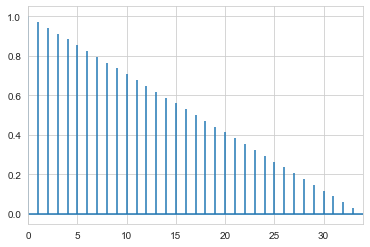

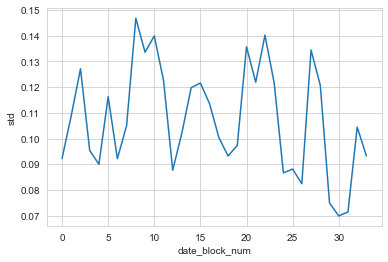

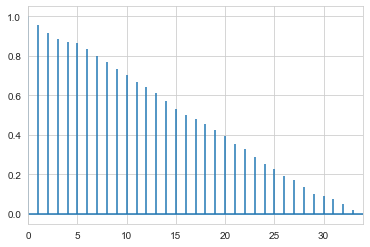

                mean  std
date_block_num           
0               3.21 0.09
1               3.22 0.11
2               3.22 0.13
3               3.21 0.10
4               3.21 0.09
5               3.22 0.12
6               3.21 0.09
7               3.21 0.11
8               3.22 0.15
9               3.22 0.13
10              3.22 0.14
11              3.23 0.12
12              3.21 0.09
13              3.22 0.10
14              3.22 0.12
15              3.21 0.12
16              3.21 0.11
17              3.21 0.10
18              3.21 0.09
19              3.21 0.10
20              3.22 0.14
21              3.22 0.12
22              3.22 0.14
23              3.23 0.12
24              3.21 0.09
25              3.21 0.09
26              3.21 0.08
27              3.21 0.13
28              3.21 0.12
29              3.20 0.07
30              3.20 0.07
31              3.20 0.07
32              3.21 0.10
33              3.21 0.09
SHOP ID:  7


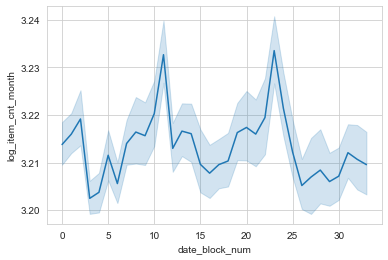

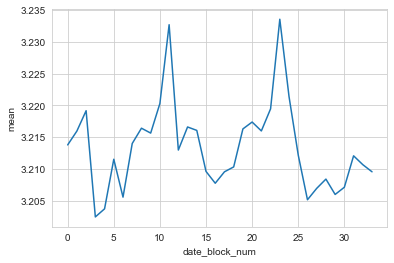

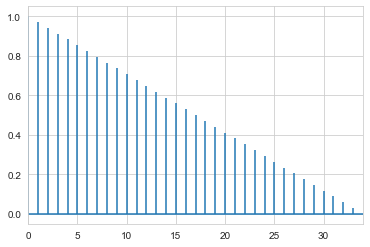

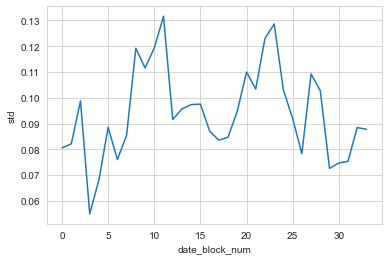

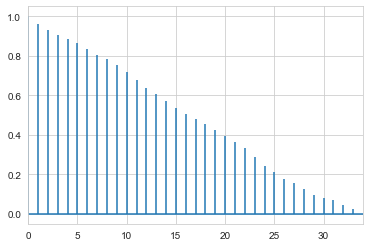

                mean  std
date_block_num           
0               3.21 0.08
1               3.22 0.08
2               3.22 0.10
3               3.20 0.05
4               3.20 0.07
5               3.21 0.09
6               3.21 0.08
7               3.21 0.09
8               3.22 0.12
9               3.22 0.11
10              3.22 0.12
11              3.23 0.13
12              3.21 0.09
13              3.22 0.10
14              3.22 0.10
15              3.21 0.10
16              3.21 0.09
17              3.21 0.08
18              3.21 0.08
19              3.22 0.09
20              3.22 0.11
21              3.22 0.10
22              3.22 0.12
23              3.23 0.13
24              3.22 0.10
25              3.21 0.09
26              3.21 0.08
27              3.21 0.11
28              3.21 0.10
29              3.21 0.07
30              3.21 0.07
31              3.21 0.08
32              3.21 0.09
33              3.21 0.09
SHOP ID:  10


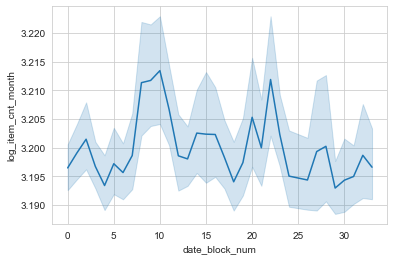

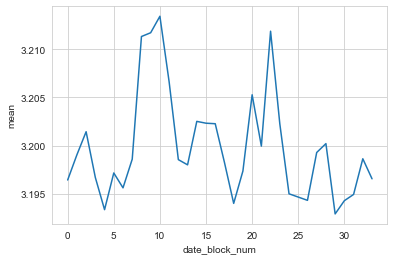

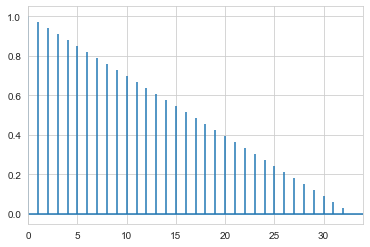

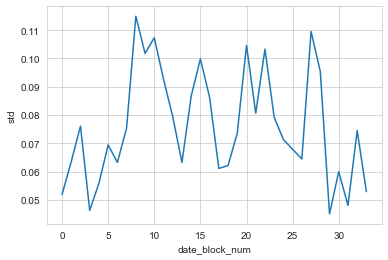

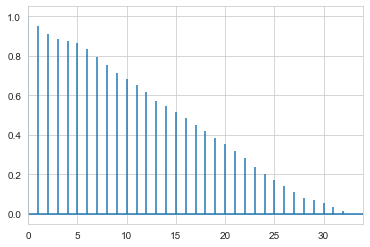

                mean  std
date_block_num           
0               3.20 0.05
1               3.20 0.06
2               3.20 0.08
3               3.20 0.05
4               3.19 0.06
5               3.20 0.07
6               3.20 0.06
7               3.20 0.08
8               3.21 0.11
9               3.21 0.10
10              3.21 0.11
11              3.21 0.09
12              3.20 0.08
13              3.20 0.06
14              3.20 0.09
15              3.20 0.10
16              3.20 0.09
17              3.20 0.06
18              3.19 0.06
19              3.20 0.07
20              3.21 0.10
21              3.20 0.08
22              3.21 0.10
23              3.20 0.08
24              3.20 0.07
26              3.19 0.06
27              3.20 0.11
28              3.20 0.10
29              3.19 0.05
30              3.19 0.06
31              3.19 0.05
32              3.20 0.07
33              3.20 0.05
SHOP ID:  12


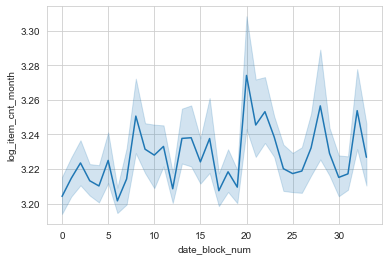

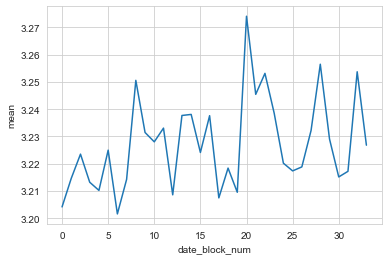

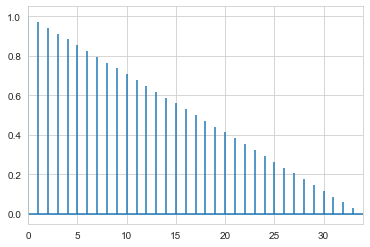

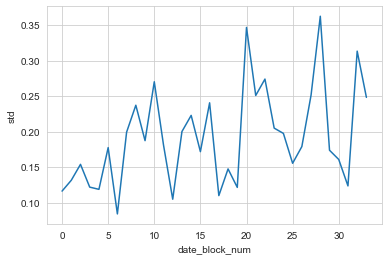

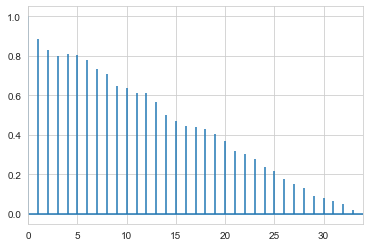

                mean  std
date_block_num           
0               3.20 0.12
1               3.21 0.13
2               3.22 0.15
3               3.21 0.12
4               3.21 0.12
5               3.22 0.18
6               3.20 0.08
7               3.21 0.20
8               3.25 0.24
9               3.23 0.19
10              3.23 0.27
11              3.23 0.18
12              3.21 0.10
13              3.24 0.20
14              3.24 0.22
15              3.22 0.17
16              3.24 0.24
17              3.21 0.11
18              3.22 0.15
19              3.21 0.12
20              3.27 0.35
21              3.25 0.25
22              3.25 0.27
23              3.24 0.20
24              3.22 0.20
25              3.22 0.16
26              3.22 0.18
27              3.23 0.25
28              3.26 0.36
29              3.23 0.17
30              3.22 0.16
31              3.22 0.12
32              3.25 0.31
33              3.23 0.25
SHOP ID:  14


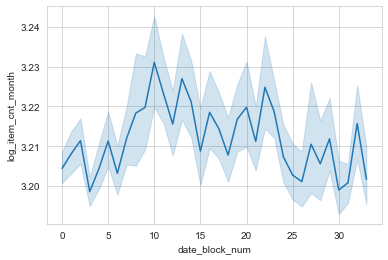

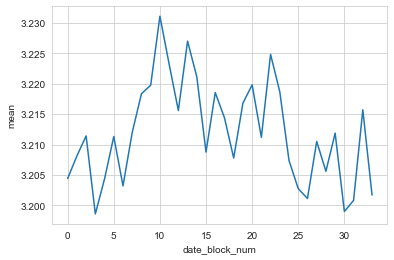

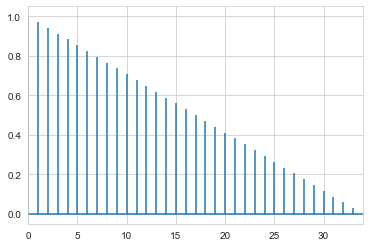

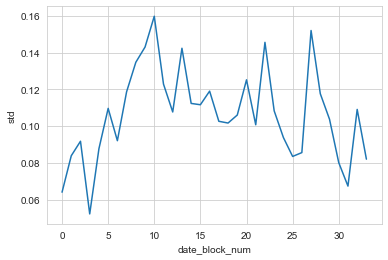

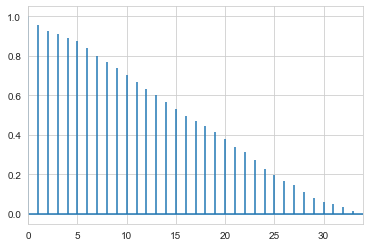

                mean  std
date_block_num           
0               3.20 0.06
1               3.21 0.08
2               3.21 0.09
3               3.20 0.05
4               3.20 0.09
5               3.21 0.11
6               3.20 0.09
7               3.21 0.12
8               3.22 0.13
9               3.22 0.14
10              3.23 0.16
11              3.22 0.12
12              3.22 0.11
13              3.23 0.14
14              3.22 0.11
15              3.21 0.11
16              3.22 0.12
17              3.21 0.10
18              3.21 0.10
19              3.22 0.11
20              3.22 0.13
21              3.21 0.10
22              3.22 0.15
23              3.22 0.11
24              3.21 0.09
25              3.20 0.08
26              3.20 0.09
27              3.21 0.15
28              3.21 0.12
29              3.21 0.10
30              3.20 0.08
31              3.20 0.07
32              3.22 0.11
33              3.20 0.08
SHOP ID:  15


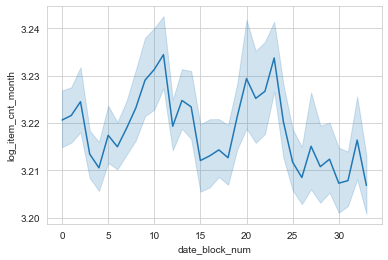

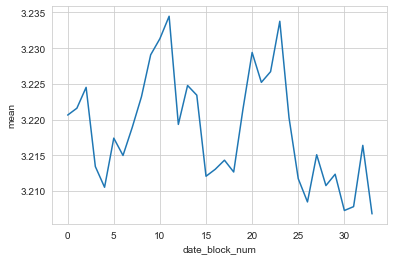

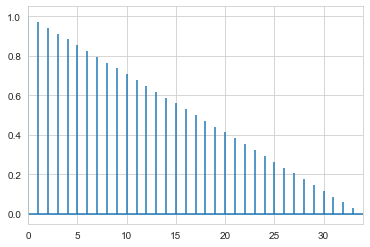

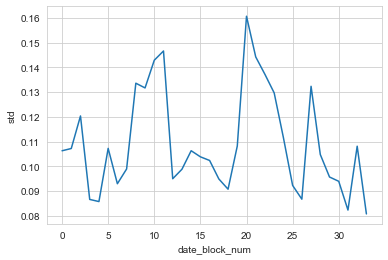

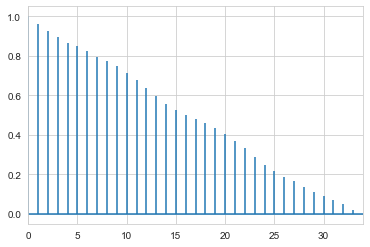

                mean  std
date_block_num           
0               3.22 0.11
1               3.22 0.11
2               3.22 0.12
3               3.21 0.09
4               3.21 0.09
5               3.22 0.11
6               3.21 0.09
7               3.22 0.10
8               3.22 0.13
9               3.23 0.13
10              3.23 0.14
11              3.23 0.15
12              3.22 0.09
13              3.22 0.10
14              3.22 0.11
15              3.21 0.10
16              3.21 0.10
17              3.21 0.09
18              3.21 0.09
19              3.22 0.11
20              3.23 0.16
21              3.23 0.14
22              3.23 0.14
23              3.23 0.13
24              3.22 0.11
25              3.21 0.09
26              3.21 0.09
27              3.22 0.13
28              3.21 0.10
29              3.21 0.10
30              3.21 0.09
31              3.21 0.08
32              3.22 0.11
33              3.21 0.08
SHOP ID:  16


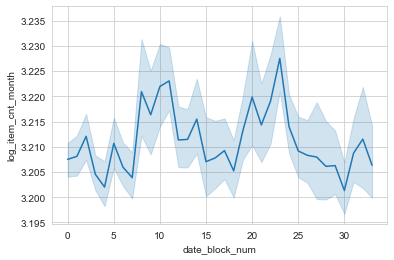

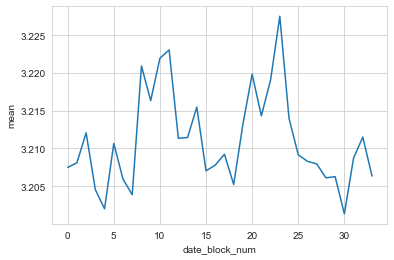

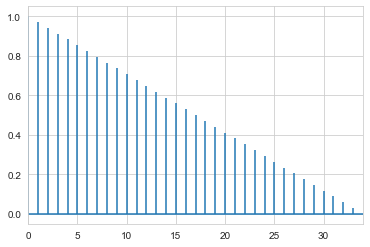

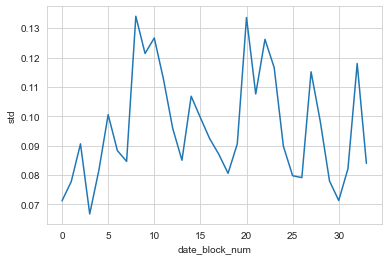

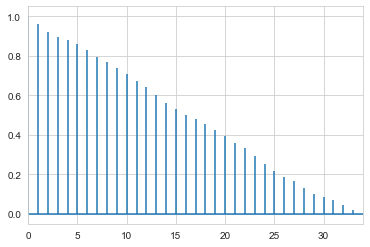

                mean  std
date_block_num           
0               3.21 0.07
1               3.21 0.08
2               3.21 0.09
3               3.20 0.07
4               3.20 0.08
5               3.21 0.10
6               3.21 0.09
7               3.20 0.08
8               3.22 0.13
9               3.22 0.12
10              3.22 0.13
11              3.22 0.11
12              3.21 0.10
13              3.21 0.08
14              3.22 0.11
15              3.21 0.10
16              3.21 0.09
17              3.21 0.09
18              3.21 0.08
19              3.21 0.09
20              3.22 0.13
21              3.21 0.11
22              3.22 0.13
23              3.23 0.12
24              3.21 0.09
25              3.21 0.08
26              3.21 0.08
27              3.21 0.12
28              3.21 0.10
29              3.21 0.08
30              3.20 0.07
31              3.21 0.08
32              3.21 0.12
33              3.21 0.08
SHOP ID:  18


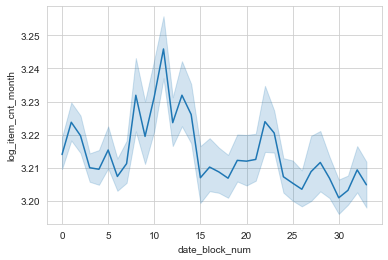

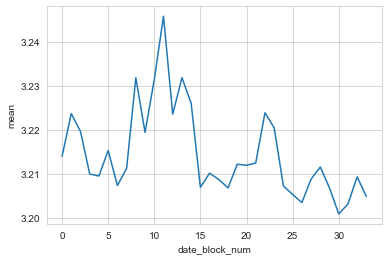

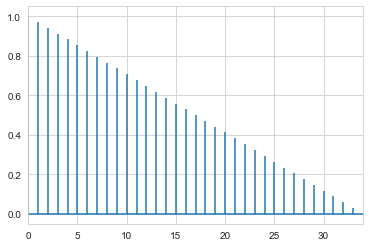

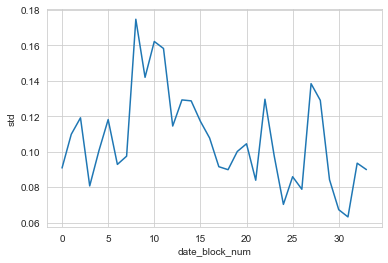

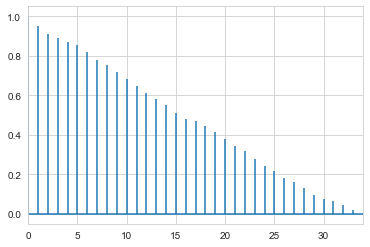

                mean  std
date_block_num           
0               3.21 0.09
1               3.22 0.11
2               3.22 0.12
3               3.21 0.08
4               3.21 0.10
5               3.22 0.12
6               3.21 0.09
7               3.21 0.10
8               3.23 0.17
9               3.22 0.14
10              3.23 0.16
11              3.25 0.16
12              3.22 0.11
13              3.23 0.13
14              3.23 0.13
15              3.21 0.12
16              3.21 0.11
17              3.21 0.09
18              3.21 0.09
19              3.21 0.10
20              3.21 0.10
21              3.21 0.08
22              3.22 0.13
23              3.22 0.10
24              3.21 0.07
25              3.21 0.09
26              3.20 0.08
27              3.21 0.14
28              3.21 0.13
29              3.21 0.08
30              3.20 0.07
31              3.20 0.06
32              3.21 0.09
33              3.20 0.09
SHOP ID:  19


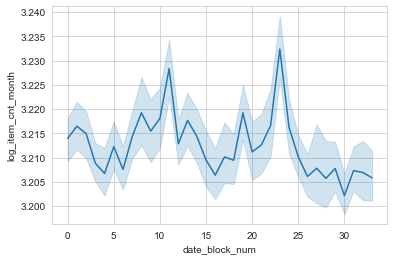

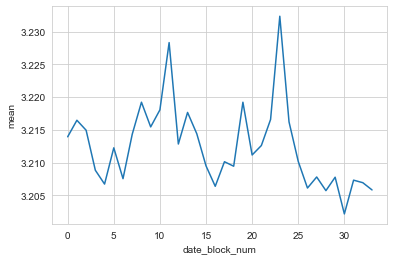

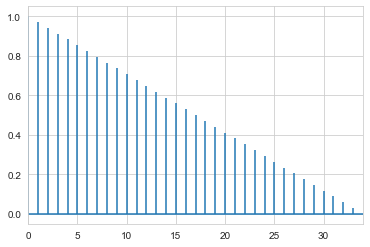

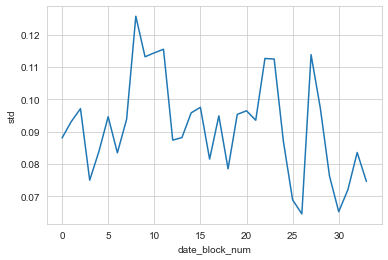

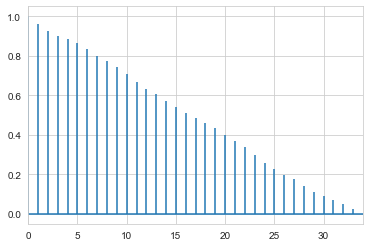

                mean  std
date_block_num           
0               3.21 0.09
1               3.22 0.09
2               3.21 0.10
3               3.21 0.07
4               3.21 0.08
5               3.21 0.09
6               3.21 0.08
7               3.21 0.09
8               3.22 0.13
9               3.22 0.11
10              3.22 0.11
11              3.23 0.12
12              3.21 0.09
13              3.22 0.09
14              3.21 0.10
15              3.21 0.10
16              3.21 0.08
17              3.21 0.09
18              3.21 0.08
19              3.22 0.10
20              3.21 0.10
21              3.21 0.09
22              3.22 0.11
23              3.23 0.11
24              3.22 0.09
25              3.21 0.07
26              3.21 0.06
27              3.21 0.11
28              3.21 0.10
29              3.21 0.08
30              3.20 0.07
31              3.21 0.07
32              3.21 0.08
33              3.21 0.07
SHOP ID:  21


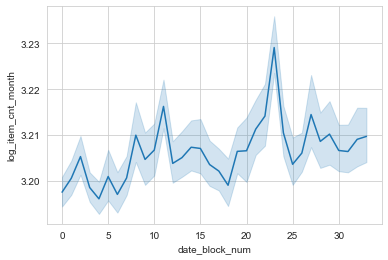

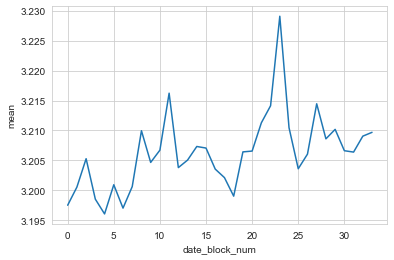

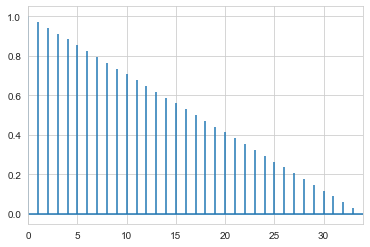

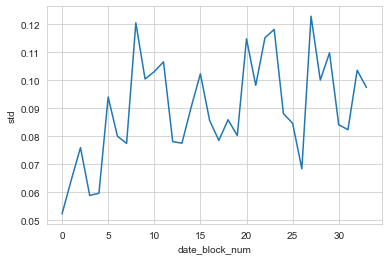

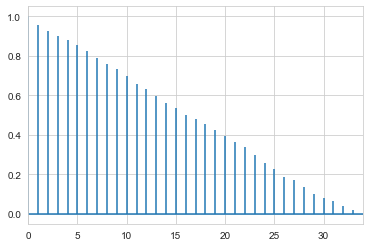

                mean  std
date_block_num           
0               3.20 0.05
1               3.20 0.06
2               3.21 0.08
3               3.20 0.06
4               3.20 0.06
5               3.20 0.09
6               3.20 0.08
7               3.20 0.08
8               3.21 0.12
9               3.20 0.10
10              3.21 0.10
11              3.22 0.11
12              3.20 0.08
13              3.21 0.08
14              3.21 0.09
15              3.21 0.10
16              3.20 0.09
17              3.20 0.08
18              3.20 0.09
19              3.21 0.08
20              3.21 0.11
21              3.21 0.10
22              3.21 0.12
23              3.23 0.12
24              3.21 0.09
25              3.20 0.08
26              3.21 0.07
27              3.21 0.12
28              3.21 0.10
29              3.21 0.11
30              3.21 0.08
31              3.21 0.08
32              3.21 0.10
33              3.21 0.10
SHOP ID:  22


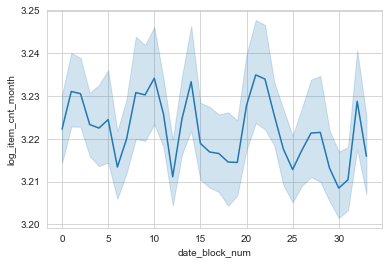

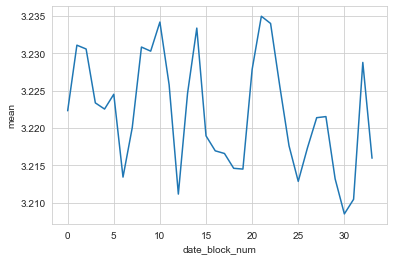

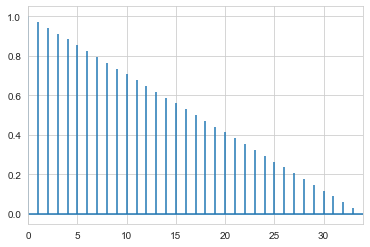

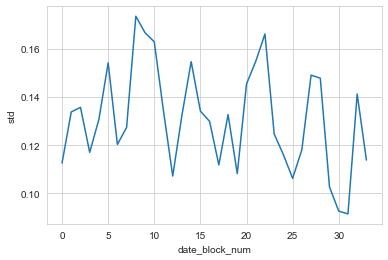

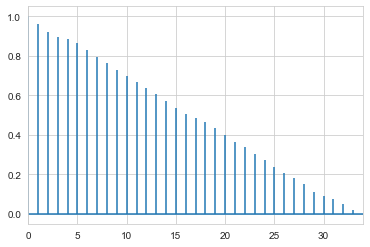

                mean  std
date_block_num           
0               3.22 0.11
1               3.23 0.13
2               3.23 0.14
3               3.22 0.12
4               3.22 0.13
5               3.22 0.15
6               3.21 0.12
7               3.22 0.13
8               3.23 0.17
9               3.23 0.17
10              3.23 0.16
11              3.23 0.13
12              3.21 0.11
13              3.22 0.13
14              3.23 0.15
15              3.22 0.13
16              3.22 0.13
17              3.22 0.11
18              3.21 0.13
19              3.21 0.11
20              3.23 0.15
21              3.23 0.15
22              3.23 0.17
23              3.23 0.12
24              3.22 0.12
25              3.21 0.11
26              3.22 0.12
27              3.22 0.15
28              3.22 0.15
29              3.21 0.10
30              3.21 0.09
31              3.21 0.09
32              3.23 0.14
33              3.22 0.11
SHOP ID:  24


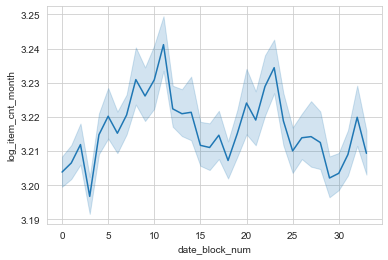

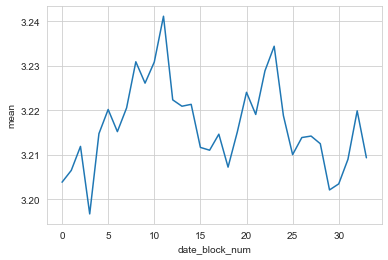

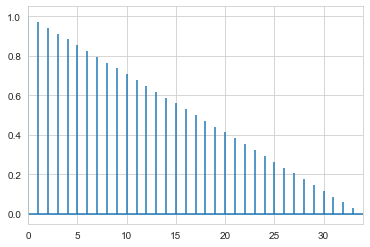

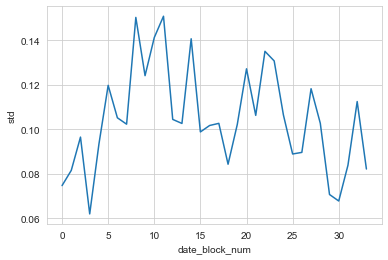

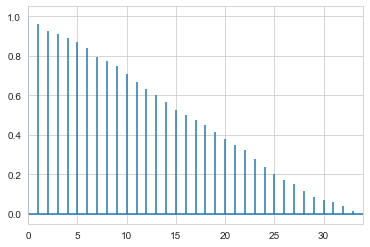

                mean  std
date_block_num           
0               3.20 0.07
1               3.21 0.08
2               3.21 0.10
3               3.20 0.06
4               3.21 0.09
5               3.22 0.12
6               3.22 0.11
7               3.22 0.10
8               3.23 0.15
9               3.23 0.12
10              3.23 0.14
11              3.24 0.15
12              3.22 0.10
13              3.22 0.10
14              3.22 0.14
15              3.21 0.10
16              3.21 0.10
17              3.21 0.10
18              3.21 0.08
19              3.22 0.10
20              3.22 0.13
21              3.22 0.11
22              3.23 0.13
23              3.23 0.13
24              3.22 0.11
25              3.21 0.09
26              3.21 0.09
27              3.21 0.12
28              3.21 0.10
29              3.20 0.07
30              3.20 0.07
31              3.21 0.08
32              3.22 0.11
33              3.21 0.08
SHOP ID:  25


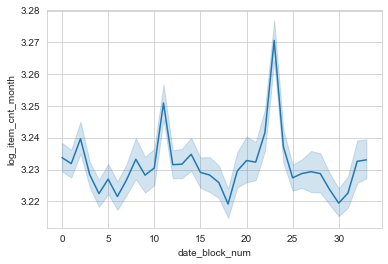

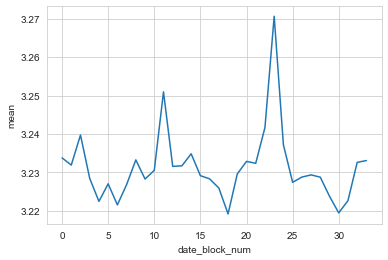

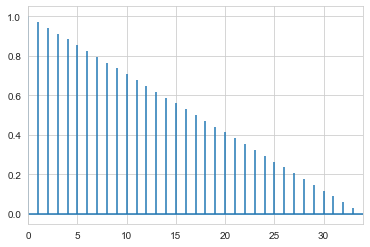

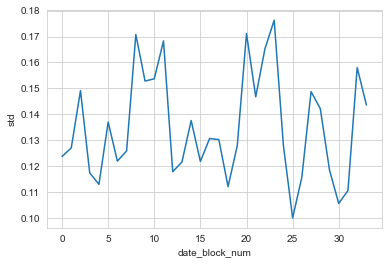

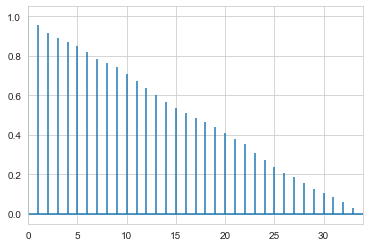

                mean  std
date_block_num           
0               3.23 0.12
1               3.23 0.13
2               3.24 0.15
3               3.23 0.12
4               3.22 0.11
5               3.23 0.14
6               3.22 0.12
7               3.23 0.13
8               3.23 0.17
9               3.23 0.15
10              3.23 0.15
11              3.25 0.17
12              3.23 0.12
13              3.23 0.12
14              3.23 0.14
15              3.23 0.12
16              3.23 0.13
17              3.23 0.13
18              3.22 0.11
19              3.23 0.13
20              3.23 0.17
21              3.23 0.15
22              3.24 0.17
23              3.27 0.18
24              3.24 0.13
25              3.23 0.10
26              3.23 0.12
27              3.23 0.15
28              3.23 0.14
29              3.22 0.12
30              3.22 0.11
31              3.22 0.11
32              3.23 0.16
33              3.23 0.14
SHOP ID:  26


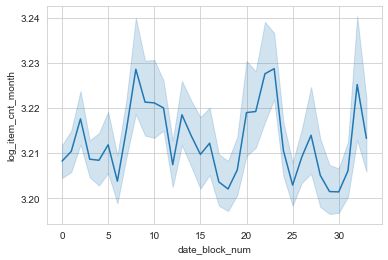

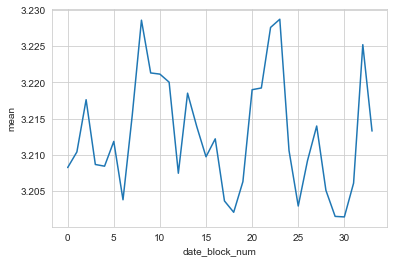

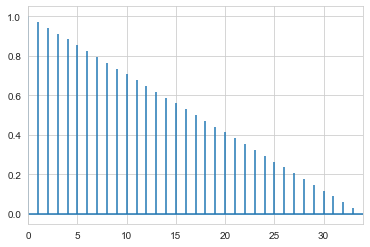

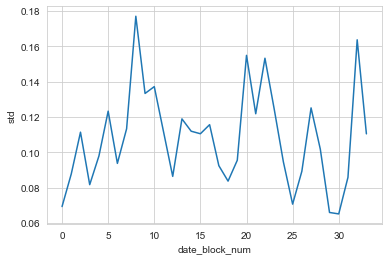

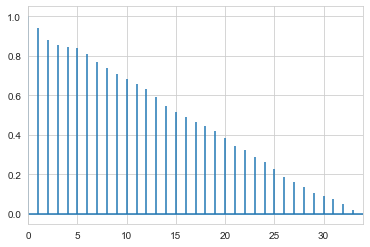

                mean  std
date_block_num           
0               3.21 0.07
1               3.21 0.09
2               3.22 0.11
3               3.21 0.08
4               3.21 0.10
5               3.21 0.12
6               3.20 0.09
7               3.22 0.11
8               3.23 0.18
9               3.22 0.13
10              3.22 0.14
11              3.22 0.11
12              3.21 0.09
13              3.22 0.12
14              3.21 0.11
15              3.21 0.11
16              3.21 0.12
17              3.20 0.09
18              3.20 0.08
19              3.21 0.10
20              3.22 0.15
21              3.22 0.12
22              3.23 0.15
23              3.23 0.12
24              3.21 0.09
25              3.20 0.07
26              3.21 0.09
27              3.21 0.13
28              3.21 0.10
29              3.20 0.07
30              3.20 0.07
31              3.21 0.09
32              3.23 0.16
33              3.21 0.11
SHOP ID:  28


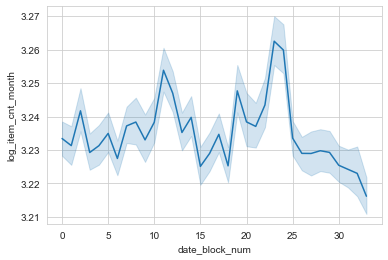

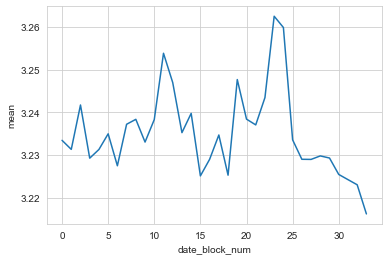

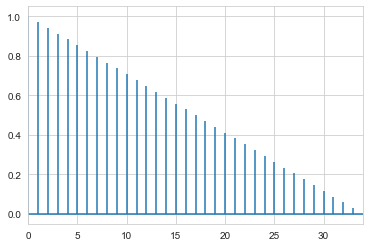

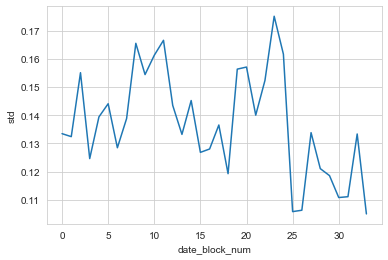

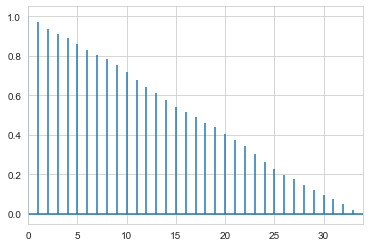

                mean  std
date_block_num           
0               3.23 0.13
1               3.23 0.13
2               3.24 0.16
3               3.23 0.12
4               3.23 0.14
5               3.23 0.14
6               3.23 0.13
7               3.24 0.14
8               3.24 0.17
9               3.23 0.15
10              3.24 0.16
11              3.25 0.17
12              3.25 0.14
13              3.24 0.13
14              3.24 0.15
15              3.23 0.13
16              3.23 0.13
17              3.23 0.14
18              3.23 0.12
19              3.25 0.16
20              3.24 0.16
21              3.24 0.14
22              3.24 0.15
23              3.26 0.18
24              3.26 0.16
25              3.23 0.11
26              3.23 0.11
27              3.23 0.13
28              3.23 0.12
29              3.23 0.12
30              3.23 0.11
31              3.22 0.11
32              3.22 0.13
33              3.22 0.11
SHOP ID:  31


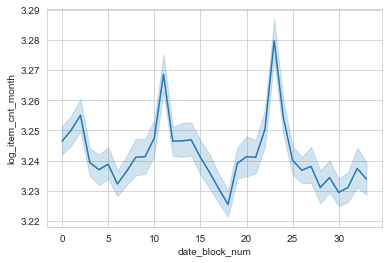

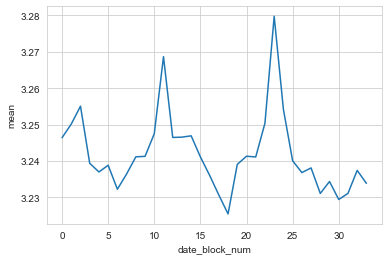

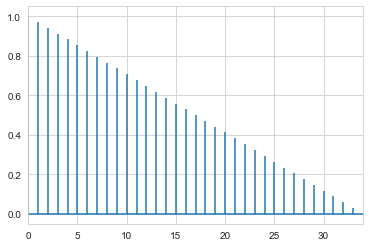

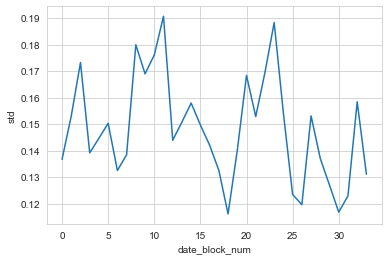

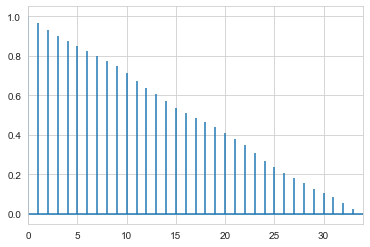

                mean  std
date_block_num           
0               3.25 0.14
1               3.25 0.15
2               3.26 0.17
3               3.24 0.14
4               3.24 0.14
5               3.24 0.15
6               3.23 0.13
7               3.24 0.14
8               3.24 0.18
9               3.24 0.17
10              3.25 0.18
11              3.27 0.19
12              3.25 0.14
13              3.25 0.15
14              3.25 0.16
15              3.24 0.15
16              3.24 0.14
17              3.23 0.13
18              3.23 0.12
19              3.24 0.14
20              3.24 0.17
21              3.24 0.15
22              3.25 0.17
23              3.28 0.19
24              3.25 0.15
25              3.24 0.12
26              3.24 0.12
27              3.24 0.15
28              3.23 0.14
29              3.23 0.13
30              3.23 0.12
31              3.23 0.12
32              3.24 0.16
33              3.23 0.13
SHOP ID:  34


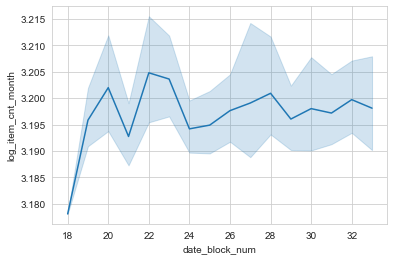

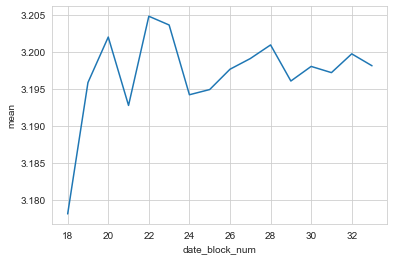

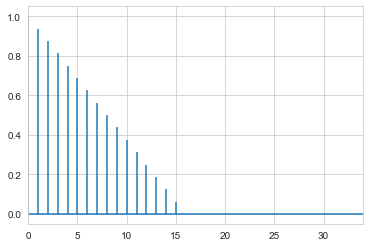

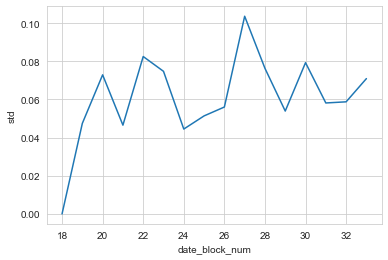

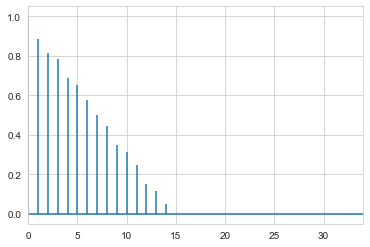

                mean  std
date_block_num           
18              3.18 0.00
19              3.20 0.05
20              3.20 0.07
21              3.19 0.05
22              3.20 0.08
23              3.20 0.07
24              3.19 0.04
25              3.19 0.05
26              3.20 0.06
27              3.20 0.10
28              3.20 0.08
29              3.20 0.05
30              3.20 0.08
31              3.20 0.06
32              3.20 0.06
33              3.20 0.07
SHOP ID:  35


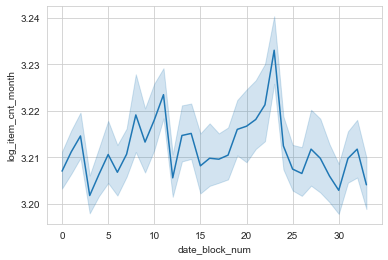

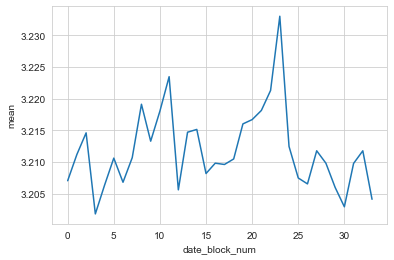

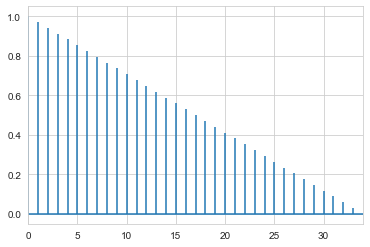

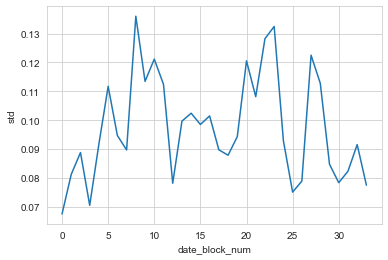

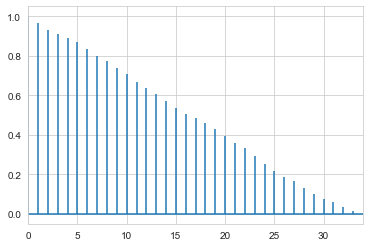

                mean  std
date_block_num           
0               3.21 0.07
1               3.21 0.08
2               3.21 0.09
3               3.20 0.07
4               3.21 0.09
5               3.21 0.11
6               3.21 0.09
7               3.21 0.09
8               3.22 0.14
9               3.21 0.11
10              3.22 0.12
11              3.22 0.11
12              3.21 0.08
13              3.21 0.10
14              3.22 0.10
15              3.21 0.10
16              3.21 0.10
17              3.21 0.09
18              3.21 0.09
19              3.22 0.09
20              3.22 0.12
21              3.22 0.11
22              3.22 0.13
23              3.23 0.13
24              3.21 0.09
25              3.21 0.08
26              3.21 0.08
27              3.21 0.12
28              3.21 0.11
29              3.21 0.08
30              3.20 0.08
31              3.21 0.08
32              3.21 0.09
33              3.20 0.08
SHOP ID:  37


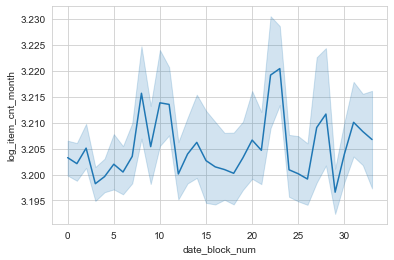

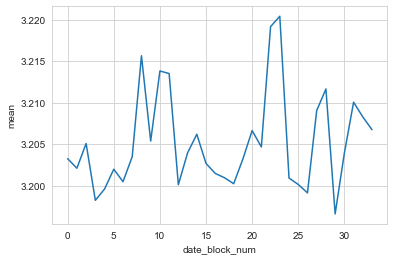

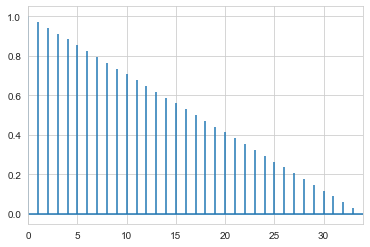

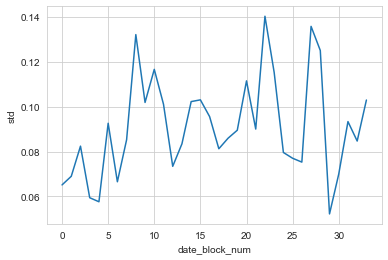

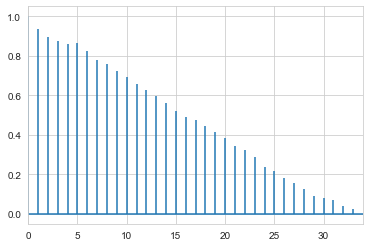

                mean  std
date_block_num           
0               3.20 0.07
1               3.20 0.07
2               3.21 0.08
3               3.20 0.06
4               3.20 0.06
5               3.20 0.09
6               3.20 0.07
7               3.20 0.09
8               3.22 0.13
9               3.21 0.10
10              3.21 0.12
11              3.21 0.10
12              3.20 0.07
13              3.20 0.08
14              3.21 0.10
15              3.20 0.10
16              3.20 0.10
17              3.20 0.08
18              3.20 0.09
19              3.20 0.09
20              3.21 0.11
21              3.20 0.09
22              3.22 0.14
23              3.22 0.12
24              3.20 0.08
25              3.20 0.08
26              3.20 0.08
27              3.21 0.14
28              3.21 0.13
29              3.20 0.05
30              3.20 0.07
31              3.21 0.09
32              3.21 0.08
33              3.21 0.10
SHOP ID:  38


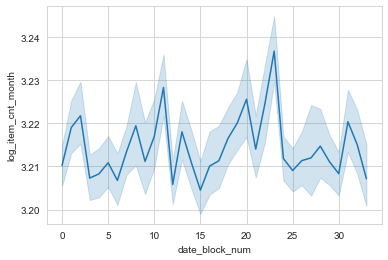

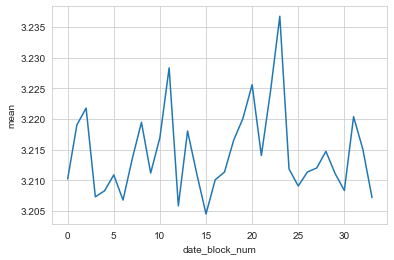

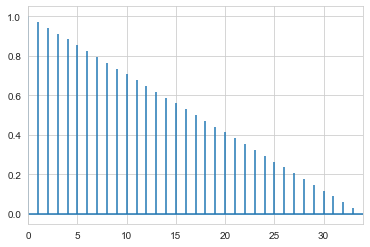

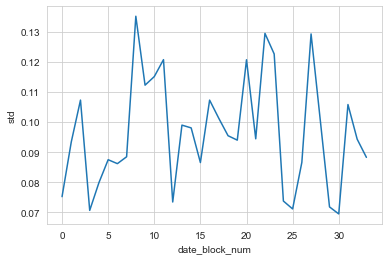

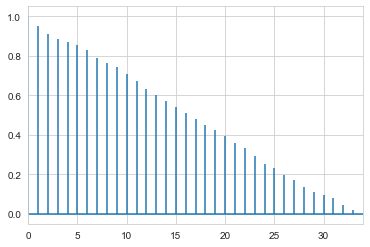

                mean  std
date_block_num           
0               3.21 0.08
1               3.22 0.09
2               3.22 0.11
3               3.21 0.07
4               3.21 0.08
5               3.21 0.09
6               3.21 0.09
7               3.21 0.09
8               3.22 0.14
9               3.21 0.11
10              3.22 0.12
11              3.23 0.12
12              3.21 0.07
13              3.22 0.10
14              3.21 0.10
15              3.20 0.09
16              3.21 0.11
17              3.21 0.10
18              3.22 0.10
19              3.22 0.09
20              3.23 0.12
21              3.21 0.09
22              3.22 0.13
23              3.24 0.12
24              3.21 0.07
25              3.21 0.07
26              3.21 0.09
27              3.21 0.13
28              3.21 0.10
29              3.21 0.07
30              3.21 0.07
31              3.22 0.11
32              3.22 0.09
33              3.21 0.09
SHOP ID:  39


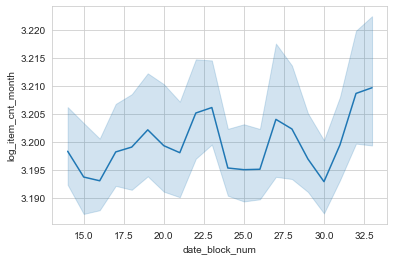

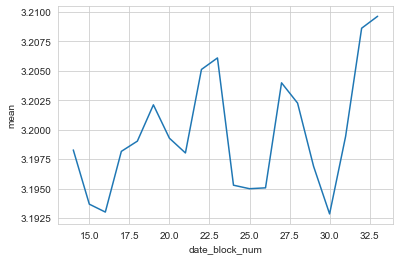

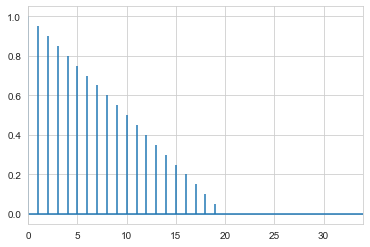

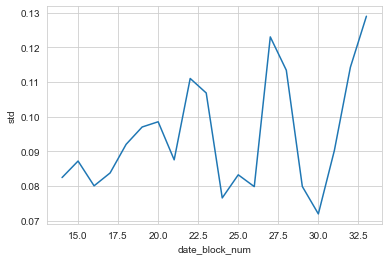

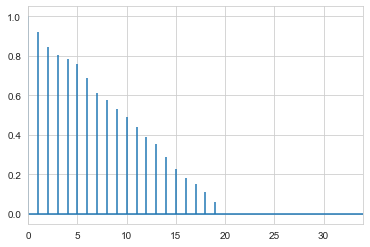

                mean  std
date_block_num           
14              3.20 0.08
15              3.19 0.09
16              3.19 0.08
17              3.20 0.08
18              3.20 0.09
19              3.20 0.10
20              3.20 0.10
21              3.20 0.09
22              3.21 0.11
23              3.21 0.11
24              3.20 0.08
25              3.19 0.08
26              3.20 0.08
27              3.20 0.12
28              3.20 0.11
29              3.20 0.08
30              3.19 0.07
31              3.20 0.09
32              3.21 0.11
33              3.21 0.13
SHOP ID:  41


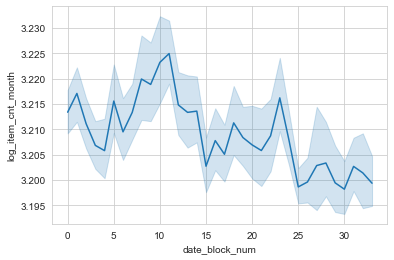

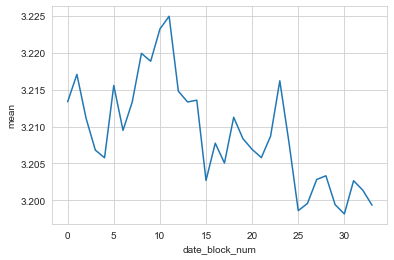

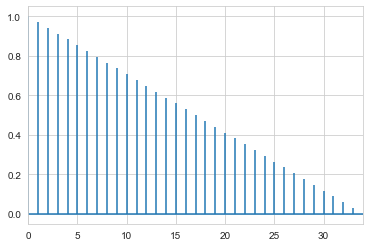

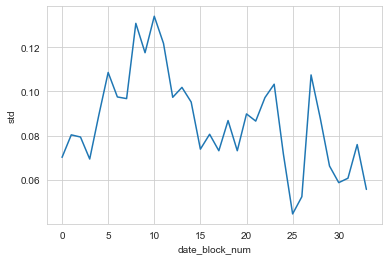

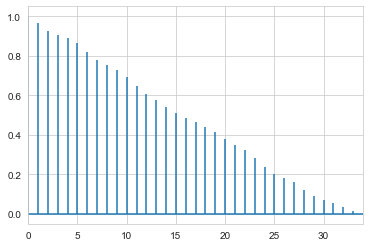

                mean  std
date_block_num           
0               3.21 0.07
1               3.22 0.08
2               3.21 0.08
3               3.21 0.07
4               3.21 0.09
5               3.22 0.11
6               3.21 0.10
7               3.21 0.10
8               3.22 0.13
9               3.22 0.12
10              3.22 0.13
11              3.22 0.12
12              3.21 0.10
13              3.21 0.10
14              3.21 0.10
15              3.20 0.07
16              3.21 0.08
17              3.21 0.07
18              3.21 0.09
19              3.21 0.07
20              3.21 0.09
21              3.21 0.09
22              3.21 0.10
23              3.22 0.10
24              3.21 0.07
25              3.20 0.04
26              3.20 0.05
27              3.20 0.11
28              3.20 0.09
29              3.20 0.07
30              3.20 0.06
31              3.20 0.06
32              3.20 0.08
33              3.20 0.06
SHOP ID:  42


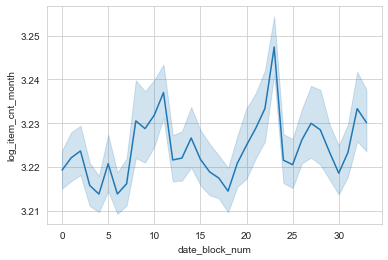

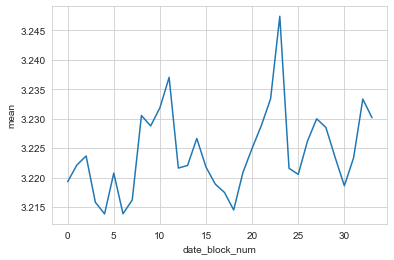

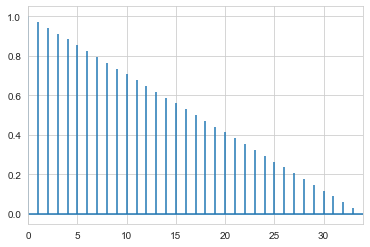

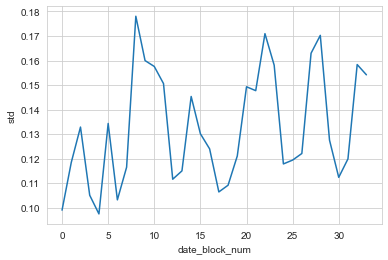

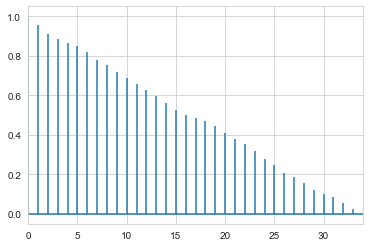

                mean  std
date_block_num           
0               3.22 0.10
1               3.22 0.12
2               3.22 0.13
3               3.22 0.11
4               3.21 0.10
5               3.22 0.13
6               3.21 0.10
7               3.22 0.12
8               3.23 0.18
9               3.23 0.16
10              3.23 0.16
11              3.24 0.15
12              3.22 0.11
13              3.22 0.11
14              3.23 0.15
15              3.22 0.13
16              3.22 0.12
17              3.22 0.11
18              3.21 0.11
19              3.22 0.12
20              3.22 0.15
21              3.23 0.15
22              3.23 0.17
23              3.25 0.16
24              3.22 0.12
25              3.22 0.12
26              3.23 0.12
27              3.23 0.16
28              3.23 0.17
29              3.22 0.13
30              3.22 0.11
31              3.22 0.12
32              3.23 0.16
33              3.23 0.15
SHOP ID:  44


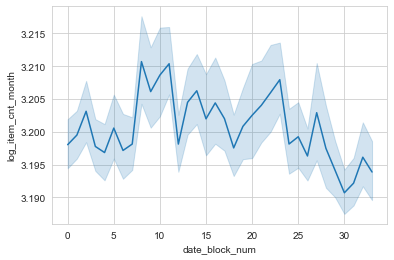

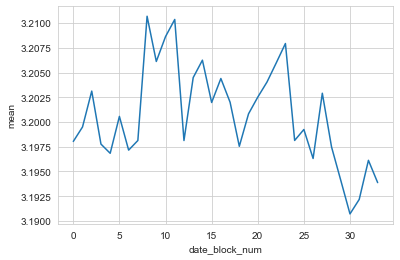

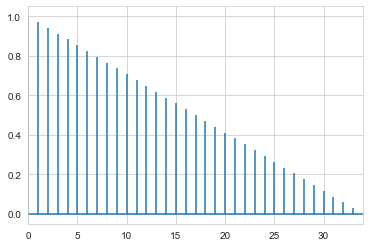

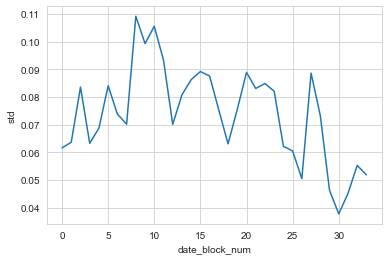

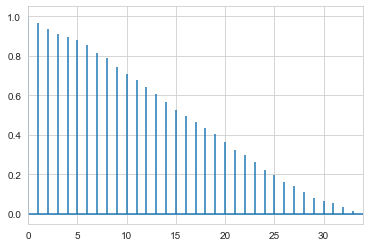

                mean  std
date_block_num           
0               3.20 0.06
1               3.20 0.06
2               3.20 0.08
3               3.20 0.06
4               3.20 0.07
5               3.20 0.08
6               3.20 0.07
7               3.20 0.07
8               3.21 0.11
9               3.21 0.10
10              3.21 0.11
11              3.21 0.09
12              3.20 0.07
13              3.20 0.08
14              3.21 0.09
15              3.20 0.09
16              3.20 0.09
17              3.20 0.08
18              3.20 0.06
19              3.20 0.08
20              3.20 0.09
21              3.20 0.08
22              3.21 0.08
23              3.21 0.08
24              3.20 0.06
25              3.20 0.06
26              3.20 0.05
27              3.20 0.09
28              3.20 0.07
29              3.19 0.05
30              3.19 0.04
31              3.19 0.05
32              3.20 0.06
33              3.19 0.05
SHOP ID:  45


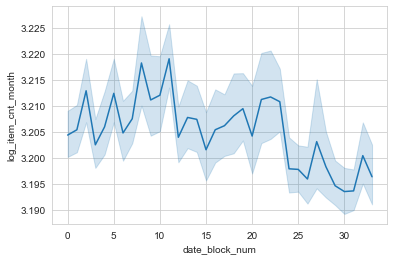

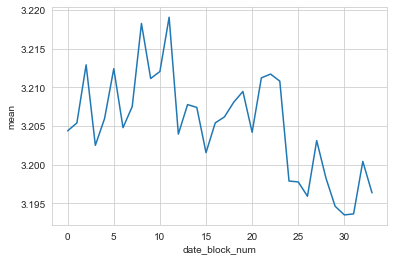

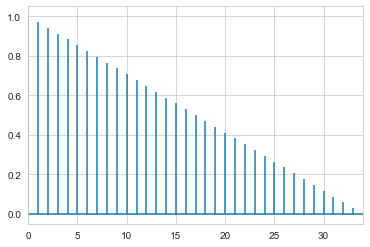

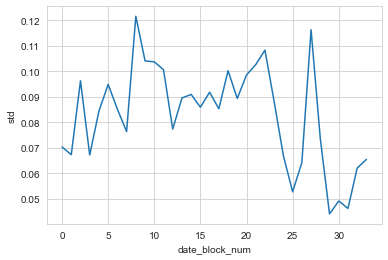

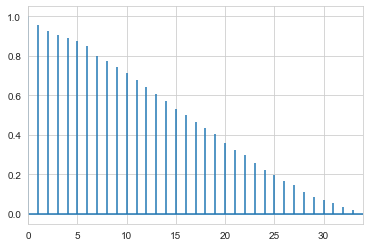

                mean  std
date_block_num           
0               3.20 0.07
1               3.21 0.07
2               3.21 0.10
3               3.20 0.07
4               3.21 0.08
5               3.21 0.09
6               3.20 0.09
7               3.21 0.08
8               3.22 0.12
9               3.21 0.10
10              3.21 0.10
11              3.22 0.10
12              3.20 0.08
13              3.21 0.09
14              3.21 0.09
15              3.20 0.09
16              3.21 0.09
17              3.21 0.09
18              3.21 0.10
19              3.21 0.09
20              3.20 0.10
21              3.21 0.10
22              3.21 0.11
23              3.21 0.09
24              3.20 0.07
25              3.20 0.05
26              3.20 0.06
27              3.20 0.12
28              3.20 0.07
29              3.19 0.04
30              3.19 0.05
31              3.19 0.05
32              3.20 0.06
33              3.20 0.07
SHOP ID:  46


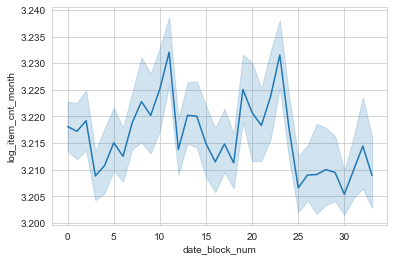

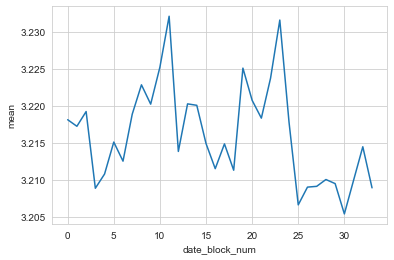

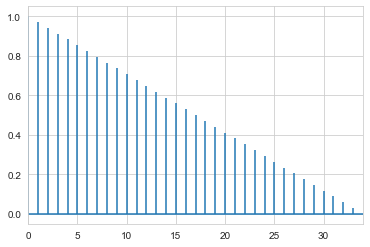

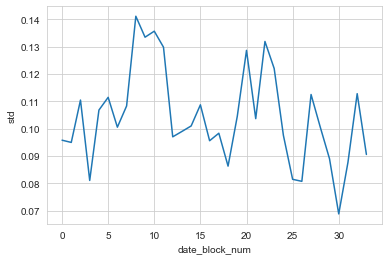

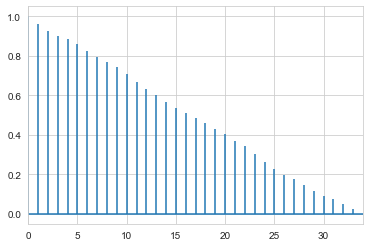

                mean  std
date_block_num           
0               3.22 0.10
1               3.22 0.09
2               3.22 0.11
3               3.21 0.08
4               3.21 0.11
5               3.22 0.11
6               3.21 0.10
7               3.22 0.11
8               3.22 0.14
9               3.22 0.13
10              3.23 0.14
11              3.23 0.13
12              3.21 0.10
13              3.22 0.10
14              3.22 0.10
15              3.21 0.11
16              3.21 0.10
17              3.21 0.10
18              3.21 0.09
19              3.23 0.10
20              3.22 0.13
21              3.22 0.10
22              3.22 0.13
23              3.23 0.12
24              3.22 0.10
25              3.21 0.08
26              3.21 0.08
27              3.21 0.11
28              3.21 0.10
29              3.21 0.09
30              3.21 0.07
31              3.21 0.09
32              3.21 0.11
33              3.21 0.09
SHOP ID:  47


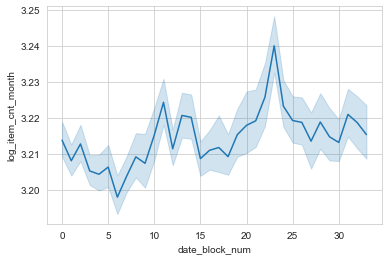

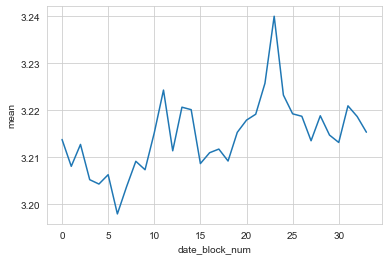

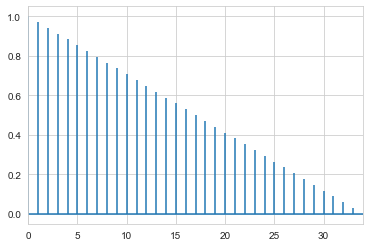

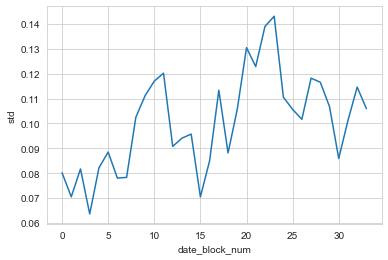

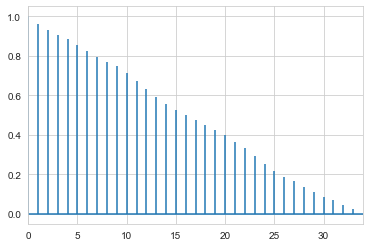

                mean  std
date_block_num           
0               3.21 0.08
1               3.21 0.07
2               3.21 0.08
3               3.21 0.06
4               3.20 0.08
5               3.21 0.09
6               3.20 0.08
7               3.20 0.08
8               3.21 0.10
9               3.21 0.11
10              3.22 0.12
11              3.22 0.12
12              3.21 0.09
13              3.22 0.09
14              3.22 0.10
15              3.21 0.07
16              3.21 0.09
17              3.21 0.11
18              3.21 0.09
19              3.22 0.11
20              3.22 0.13
21              3.22 0.12
22              3.23 0.14
23              3.24 0.14
24              3.22 0.11
25              3.22 0.11
26              3.22 0.10
27              3.21 0.12
28              3.22 0.12
29              3.21 0.11
30              3.21 0.09
31              3.22 0.10
32              3.22 0.11
33              3.22 0.11
SHOP ID:  48


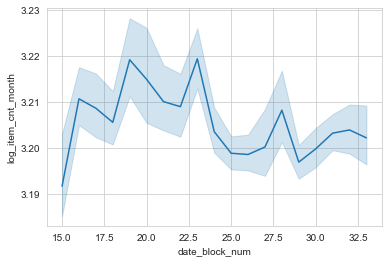

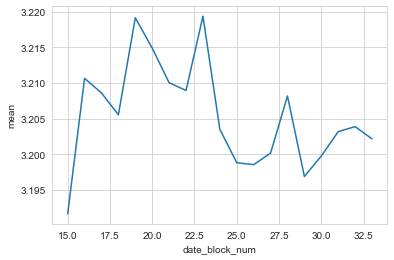

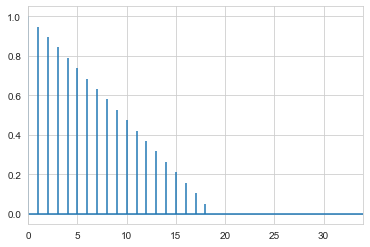

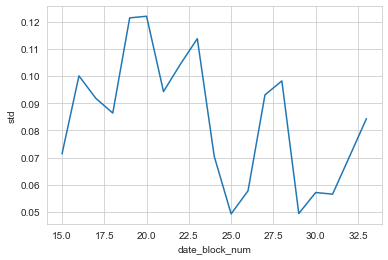

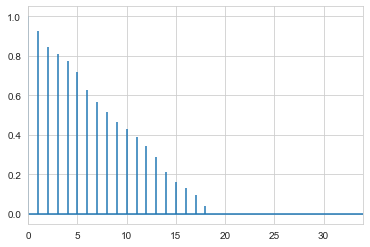

                mean  std
date_block_num           
15              3.19 0.07
16              3.21 0.10
17              3.21 0.09
18              3.21 0.09
19              3.22 0.12
20              3.21 0.12
21              3.21 0.09
22              3.21 0.10
23              3.22 0.11
24              3.20 0.07
25              3.20 0.05
26              3.20 0.06
27              3.20 0.09
28              3.21 0.10
29              3.20 0.05
30              3.20 0.06
31              3.20 0.06
32              3.20 0.07
33              3.20 0.08
SHOP ID:  49


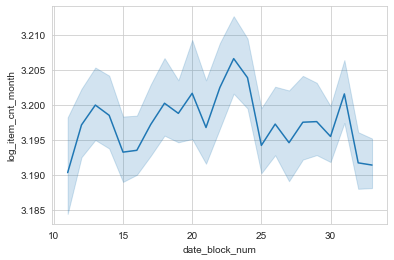

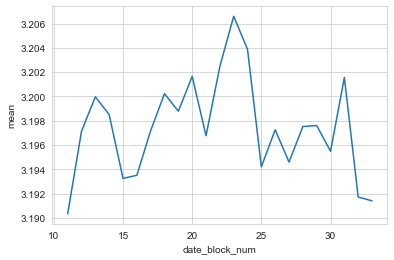

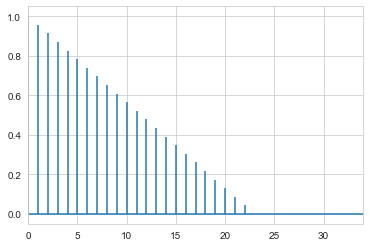

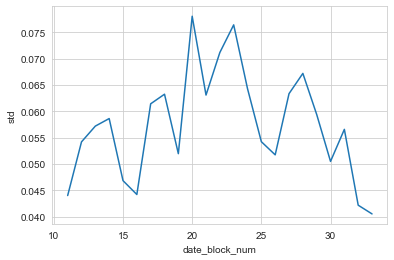

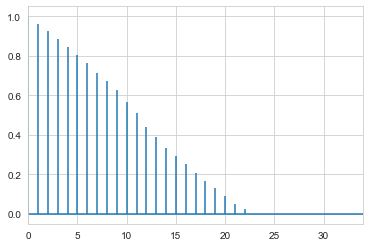

                mean  std
date_block_num           
11              3.19 0.04
12              3.20 0.05
13              3.20 0.06
14              3.20 0.06
15              3.19 0.05
16              3.19 0.04
17              3.20 0.06
18              3.20 0.06
19              3.20 0.05
20              3.20 0.08
21              3.20 0.06
22              3.20 0.07
23              3.21 0.08
24              3.20 0.06
25              3.19 0.05
26              3.20 0.05
27              3.19 0.06
28              3.20 0.07
29              3.20 0.06
30              3.20 0.05
31              3.20 0.06
32              3.19 0.04
33              3.19 0.04
SHOP ID:  50


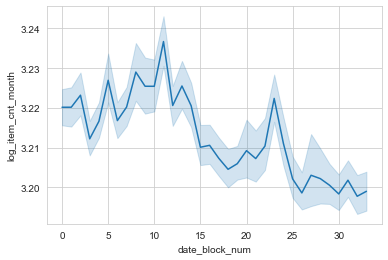

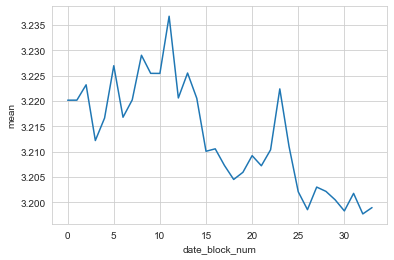

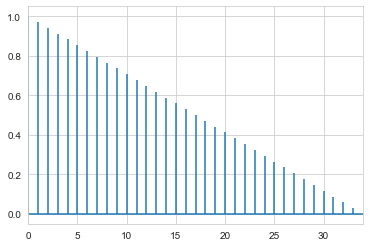

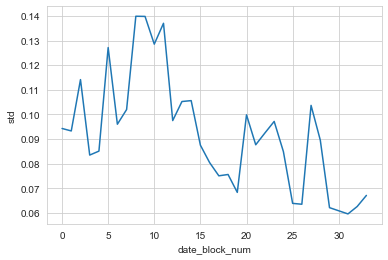

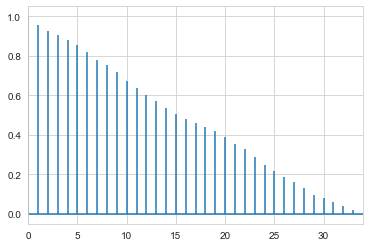

                mean  std
date_block_num           
0               3.22 0.09
1               3.22 0.09
2               3.22 0.11
3               3.21 0.08
4               3.22 0.09
5               3.23 0.13
6               3.22 0.10
7               3.22 0.10
8               3.23 0.14
9               3.23 0.14
10              3.23 0.13
11              3.24 0.14
12              3.22 0.10
13              3.23 0.11
14              3.22 0.11
15              3.21 0.09
16              3.21 0.08
17              3.21 0.08
18              3.20 0.08
19              3.21 0.07
20              3.21 0.10
21              3.21 0.09
22              3.21 0.09
23              3.22 0.10
24              3.21 0.08
25              3.20 0.06
26              3.20 0.06
27              3.20 0.10
28              3.20 0.09
29              3.20 0.06
30              3.20 0.06
31              3.20 0.06
32              3.20 0.06
33              3.20 0.07
SHOP ID:  52


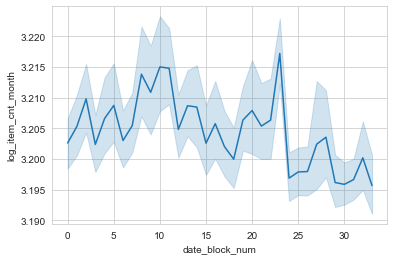

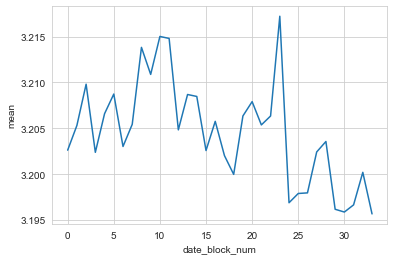

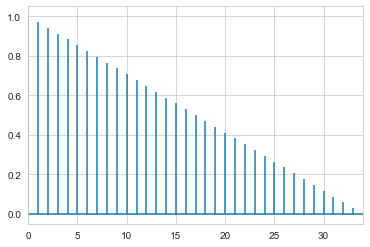

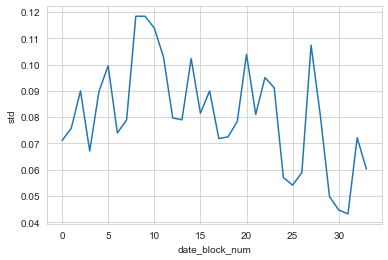

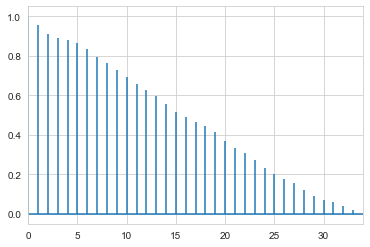

                mean  std
date_block_num           
0               3.20 0.07
1               3.21 0.08
2               3.21 0.09
3               3.20 0.07
4               3.21 0.09
5               3.21 0.10
6               3.20 0.07
7               3.21 0.08
8               3.21 0.12
9               3.21 0.12
10              3.22 0.11
11              3.21 0.10
12              3.20 0.08
13              3.21 0.08
14              3.21 0.10
15              3.20 0.08
16              3.21 0.09
17              3.20 0.07
18              3.20 0.07
19              3.21 0.08
20              3.21 0.10
21              3.21 0.08
22              3.21 0.10
23              3.22 0.09
24              3.20 0.06
25              3.20 0.05
26              3.20 0.06
27              3.20 0.11
28              3.20 0.08
29              3.20 0.05
30              3.20 0.04
31              3.20 0.04
32              3.20 0.07
33              3.20 0.06
SHOP ID:  53


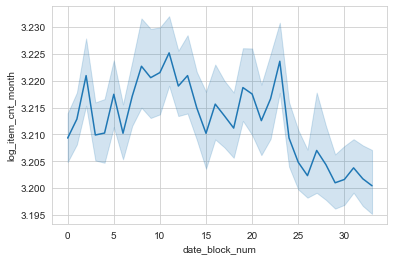

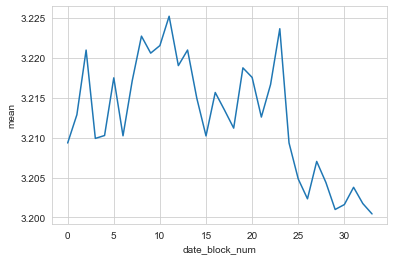

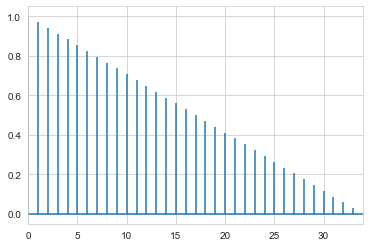

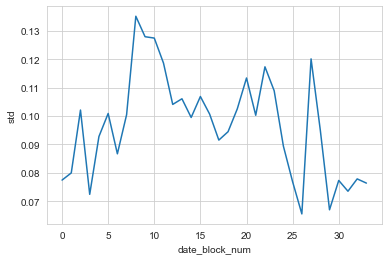

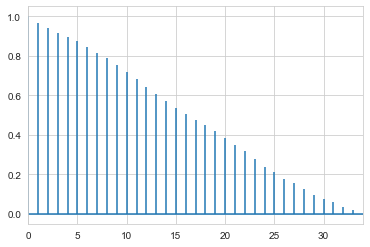

                mean  std
date_block_num           
0               3.21 0.08
1               3.21 0.08
2               3.22 0.10
3               3.21 0.07
4               3.21 0.09
5               3.22 0.10
6               3.21 0.09
7               3.22 0.10
8               3.22 0.14
9               3.22 0.13
10              3.22 0.13
11              3.23 0.12
12              3.22 0.10
13              3.22 0.11
14              3.21 0.10
15              3.21 0.11
16              3.22 0.10
17              3.21 0.09
18              3.21 0.09
19              3.22 0.10
20              3.22 0.11
21              3.21 0.10
22              3.22 0.12
23              3.22 0.11
24              3.21 0.09
25              3.20 0.08
26              3.20 0.07
27              3.21 0.12
28              3.20 0.10
29              3.20 0.07
30              3.20 0.08
31              3.20 0.07
32              3.20 0.08
33              3.20 0.08
SHOP ID:  55


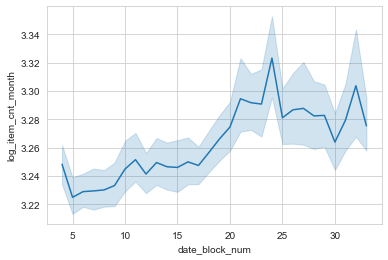

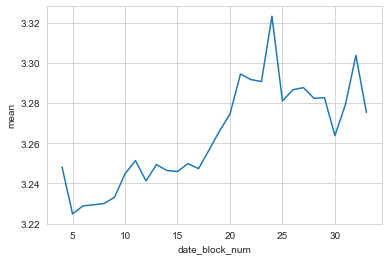

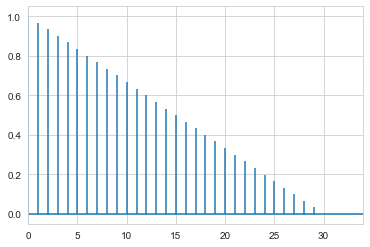

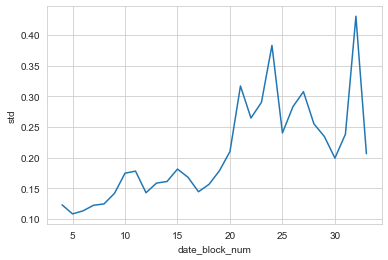

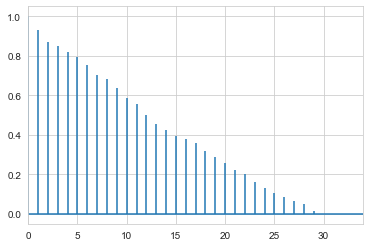

                mean  std
date_block_num           
4               3.25 0.12
5               3.22 0.11
6               3.23 0.11
7               3.23 0.12
8               3.23 0.12
9               3.23 0.14
10              3.24 0.17
11              3.25 0.18
12              3.24 0.14
13              3.25 0.16
14              3.25 0.16
15              3.25 0.18
16              3.25 0.17
17              3.25 0.14
18              3.26 0.16
19              3.27 0.18
20              3.27 0.21
21              3.29 0.32
22              3.29 0.26
23              3.29 0.29
24              3.32 0.38
25              3.28 0.24
26              3.29 0.28
27              3.29 0.31
28              3.28 0.26
29              3.28 0.23
30              3.26 0.20
31              3.28 0.24
32              3.30 0.43
33              3.28 0.21
SHOP ID:  56


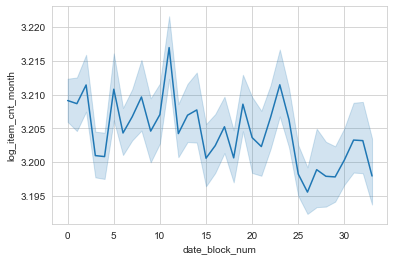

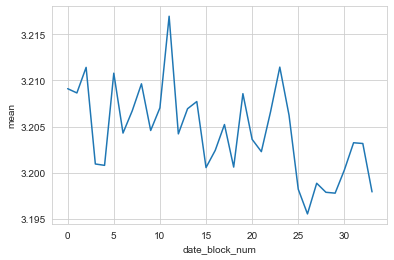

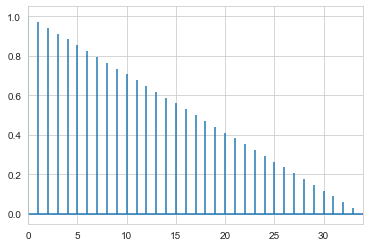

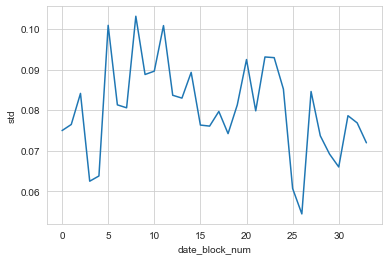

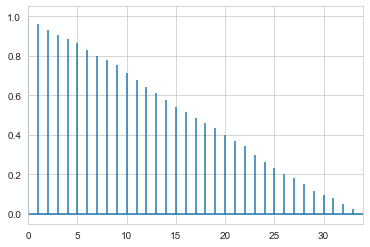

                mean  std
date_block_num           
0               3.21 0.07
1               3.21 0.08
2               3.21 0.08
3               3.20 0.06
4               3.20 0.06
5               3.21 0.10
6               3.20 0.08
7               3.21 0.08
8               3.21 0.10
9               3.20 0.09
10              3.21 0.09
11              3.22 0.10
12              3.20 0.08
13              3.21 0.08
14              3.21 0.09
15              3.20 0.08
16              3.20 0.08
17              3.21 0.08
18              3.20 0.07
19              3.21 0.08
20              3.20 0.09
21              3.20 0.08
22              3.21 0.09
23              3.21 0.09
24              3.21 0.09
25              3.20 0.06
26              3.20 0.05
27              3.20 0.08
28              3.20 0.07
29              3.20 0.07
30              3.20 0.07
31              3.20 0.08
32              3.20 0.08
33              3.20 0.07
SHOP ID:  57


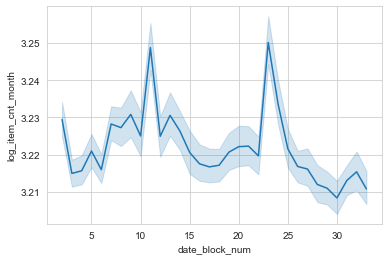

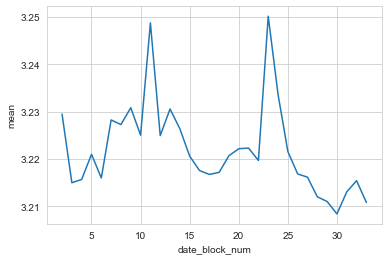

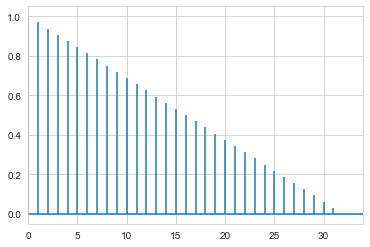

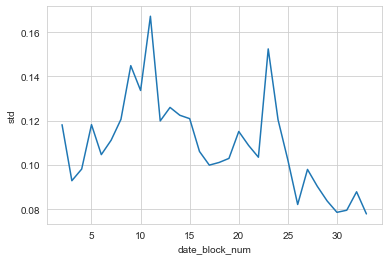

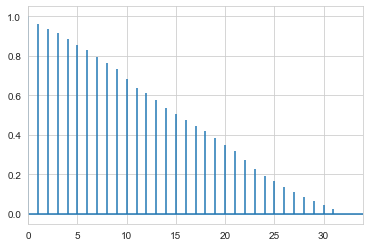

                mean  std
date_block_num           
2               3.23 0.12
3               3.22 0.09
4               3.22 0.10
5               3.22 0.12
6               3.22 0.10
7               3.23 0.11
8               3.23 0.12
9               3.23 0.14
10              3.23 0.13
11              3.25 0.17
12              3.22 0.12
13              3.23 0.13
14              3.23 0.12
15              3.22 0.12
16              3.22 0.11
17              3.22 0.10
18              3.22 0.10
19              3.22 0.10
20              3.22 0.12
21              3.22 0.11
22              3.22 0.10
23              3.25 0.15
24              3.23 0.12
25              3.22 0.10
26              3.22 0.08
27              3.22 0.10
28              3.21 0.09
29              3.21 0.08
30              3.21 0.08
31              3.21 0.08
32              3.22 0.09
33              3.21 0.08
SHOP ID:  58


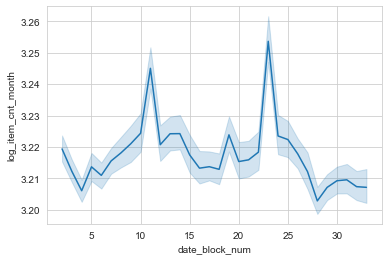

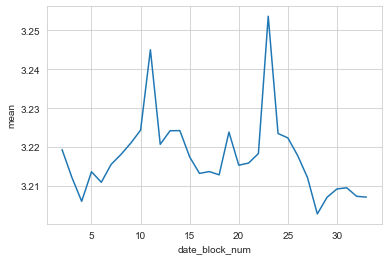

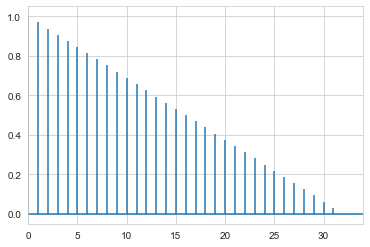

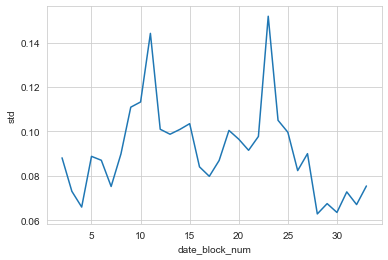

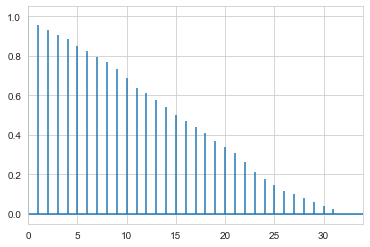

                mean  std
date_block_num           
2               3.22 0.09
3               3.21 0.07
4               3.21 0.07
5               3.21 0.09
6               3.21 0.09
7               3.22 0.08
8               3.22 0.09
9               3.22 0.11
10              3.22 0.11
11              3.25 0.14
12              3.22 0.10
13              3.22 0.10
14              3.22 0.10
15              3.22 0.10
16              3.21 0.08
17              3.21 0.08
18              3.21 0.09
19              3.22 0.10
20              3.22 0.10
21              3.22 0.09
22              3.22 0.10
23              3.25 0.15
24              3.22 0.11
25              3.22 0.10
26              3.22 0.08
27              3.21 0.09
28              3.20 0.06
29              3.21 0.07
30              3.21 0.06
31              3.21 0.07
32              3.21 0.07
33              3.21 0.08
SHOP ID:  59


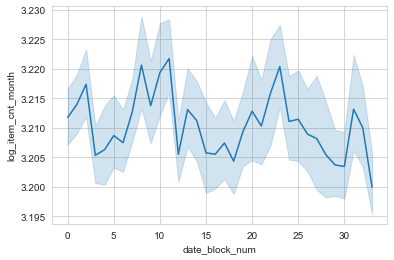

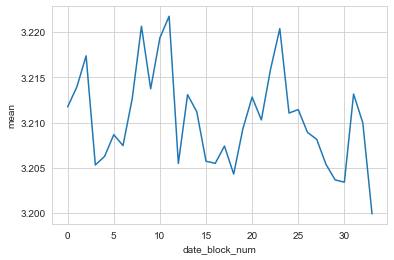

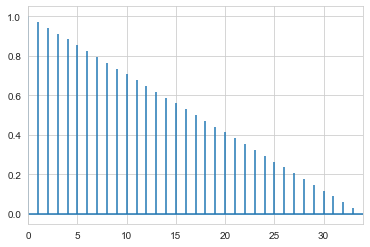

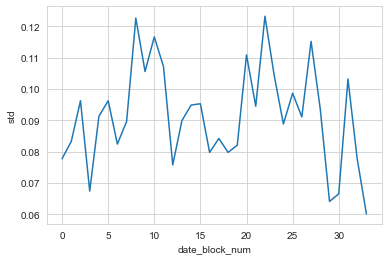

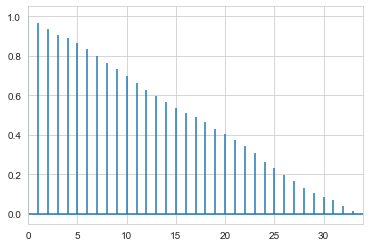

                mean  std
date_block_num           
0               3.21 0.08
1               3.21 0.08
2               3.22 0.10
3               3.21 0.07
4               3.21 0.09
5               3.21 0.10
6               3.21 0.08
7               3.21 0.09
8               3.22 0.12
9               3.21 0.11
10              3.22 0.12
11              3.22 0.11
12              3.21 0.08
13              3.21 0.09
14              3.21 0.09
15              3.21 0.10
16              3.21 0.08
17              3.21 0.08
18              3.20 0.08
19              3.21 0.08
20              3.21 0.11
21              3.21 0.09
22              3.22 0.12
23              3.22 0.10
24              3.21 0.09
25              3.21 0.10
26              3.21 0.09
27              3.21 0.12
28              3.21 0.09
29              3.20 0.06
30              3.20 0.07
31              3.21 0.10
32              3.21 0.08
33              3.20 0.06


In [168]:
shops = set(data.shop_id)

for shop_id in shops:
    
    shop_sell_data = data.loc[data.shop_id == shop_id]
    
    print('='*100, '\nSHOP ID: ', shop_id)
    
    sns.lineplot(data=shop_sell_data, x='date_block_num', y='log_item_cnt_month')
    plt.show()
    
    mean_std_shop_data = shop_sell_data.groupby(['date_block_num']).agg({'log_item_cnt_month': 'mean'})\
                .rename({'log_item_cnt_month': 'mean'}, axis=1)
    sns.lineplot(data=mean_std_shop_data, x='date_block_num', y='mean')
    plt.show()
    
    plt.acorr(mean_std_shop_data['mean'], maxlags=None)
    plt.xlim([0, 34])
    plt.show()
    
    
    mean_std_shop_data['std'] = shop_sell_data.groupby(['date_block_num']).agg({'log_item_cnt_month': 'std'})\
                .rename({'log_item_cnt_month': 'std'}, axis=1)['std']
    sns.lineplot(data=mean_std_shop_data, x='date_block_num', y='std')
    plt.show()
    
    plt.acorr(mean_std_shop_data['std'], maxlags=None)
    plt.xlim([0, 34])
    plt.show()
    
    print(mean_std_shop_data)
    